In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import plotly.graph_objs as go
import plotly.offline as py
import scipy
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.regression.linear_model import  OLS
from statsmodels.stats.anova import anova_lm
from scipy import stats
pd.pandas.set_option('display.max_columns',None)
plt.style.use("dark_background")
# warnings.filterwarnings("ignore")

In [3]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=(15,8)
plt.rcParams['font.size']=18

In [4]:
df=pd.read_csv('SCMS_Delivery_History_Dataset.csv',  ) # read the csv data
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [5]:
# Function to extract the ID from a string
def find_id(x):
    x = str(x)
    if x.find('#') != -1:
        # Extract the ID by finding the index of '#' and adding 2 to skip the '#' and the space after it
        a = x.index('#') + 2
        return int(x[a:-1])
    else:
        return 0

# Function to extract the ASN (Assessment Serial Number) from a string
def find_asn(x):
    x = str(x)
    if x.find('(') != -1:
        # Extract the ASN by finding the index of '(' and subtracting 1 to exclude the space before it
        a = x.index('(') - 1
        return x[4:a]
    else:
        return 0

# Function to retrieve the freight cost based on the given ID
def cost(x, df=df):
    if x == 0:
        return x
    else:
        return df[df['ID'] == x]['Freight Cost (USD)'].values[0]

# Function to retrieve the weight based on the given ID
def weight(x, df=df):
    if x == 0:
        return x
    else:
        return df[df['ID'] == x]['Weight (Kilograms)'].values[0]

# Mapping the 'Freight_cost_See_ID' column with the extracted ID using the 'find_id' function
df['Freight_cost_See_ID'] = df['Freight Cost (USD)'].map(find_id)

# Mapping the 'Freight_cost_See_ASN' column with the extracted ASN using the 'find_asn' function
# df['Freight_cost_See_ASN'] = df['Freight Cost (USD)'].map(find_asn)

# Mapping the 'Freight_cost_using_ID' column with the freight cost using the ID from 'Freight_cost_See_ID' column
df['Freight_cost_using_ID'] = df['Freight_cost_See_ID'].map(cost)

# Mapping the 'Weight_See_ID' column with the extracted ID using the 'find_id' function
df['Weight_See_ID'] = df['Weight (Kilograms)'].map(find_id)

# Mapping the 'weight_using_ID' column with the weight using the ID from 'Weight_See_ID' column
df['weight_using_ID'] = df['Weight_See_ID'].map(weight)
# --------------------------------------------------------------------------------------------------------------------------------------------------#

# Selecting specific columns and creating a new dataframe object
a = df[['ID', 'Freight Cost (USD)', 'Freight_cost_See_ID', 'Freight_cost_using_ID']]

# Storing the values extracted from the data to 'Freight Cost (USD)'
a.loc[a['Freight_cost_See_ID'] != 0, 'Freight Cost (USD)'] = a.loc[a['Freight_cost_See_ID'] != 0, 'Freight_cost_using_ID']
df['Freight Cost (USD)'] = a['Freight Cost (USD)']

# Replacing 'Freight Included in Commodity Cost' with 'Line Item Value' in 'Freight Cost (USD)'
df.loc[df['Freight Cost (USD)'] == 'Freight Included in Commodity Cost', 'Freight Cost (USD)'] = df.loc[df['Freight Cost (USD)'] == 'Freight Included in Commodity Cost', 'Line Item Value']

# Replacing 'Invoiced Separately' with 'Line Item Value' in 'Freight Cost (USD)'
df.loc[df['Freight Cost (USD)'] == 'Invoiced Separately', 'Freight Cost (USD)'] = df.loc[df['Freight Cost (USD)'] == 'Invoiced Separately', 'Line Item Value']

# Converting 'Freight Cost (USD)' to float data type
df['Freight Cost (USD)'] = df['Freight Cost (USD)'].astype('float64')

# Replacing non-zero 'Weight_See_ID' values with 'weight_using_ID' in 'Weight (Kilograms)'
df.loc[df['Weight_See_ID'] != 0, 'Weight (Kilograms)'] = df.loc[df['Weight_See_ID'] != 0, 'weight_using_ID']

# Replacing 'Weight Captured Separately' with '0' in 'Weight (Kilograms)'
df.loc[df['Weight (Kilograms)'] == 'Weight Captured Separately', 'Weight (Kilograms)'] = '0'

# Converting 'Weight (Kilograms)' to int data type
df['Weight (Kilograms)'] = df['Weight (Kilograms)'].astype('int64')

# Replacing zero values in 'Weight (Kilograms)' with NaN and forward filling with the previous non-zero value for each 'PO / SO #'
df.loc[df['Weight (Kilograms)']==0,'Weight (Kilograms)']=np.nan
df['Weight (Kilograms)'] = df.groupby('PO / SO #')['Weight (Kilograms)'].transform(lambda x: x.fillna(method='ffill'))

# Filling remaining NaN values in 'Weight (Kilograms)' with the mean value
df['Weight (Kilograms)'] = df['Weight (Kilograms)'].fillna(df['Weight (Kilograms)'].mean())

# Forward filling NaN values in 'Shipment Mode' column
df['Shipment Mode'] = df['Shipment Mode'].fillna(method='ffill')

# Replacing NaN values in 'Line Item Insurance (USD)' with 0
df.loc[df['Line Item Insurance (USD)'].isna(), 'Line Item Insurance (USD)'] = 0

# Dropping unnecessary columns
df.drop(columns=['Freight_cost_See_ID', 'Freight_cost_using_ID', 'Weight_See_ID', 'weight_using_ID'], inplace=True)


# Missing value Treatment

In [6]:
df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                      0
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [7]:
mode_per_country = df.groupby('Country')['Dosage'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

# Function to replace missing values with the mode for the respective country
def replace_missing_with_mode(row):
    country = row['Country']
    dosage = row['Dosage']
    if pd.isnull(dosage):
        return mode_per_country[country]
    return dosage

# Apply the replacement function to each row
df['Dosage'] = df.apply(replace_missing_with_mode, axis=1)

In [8]:
df.isnull().sum()

ID                               0
Project Code                     0
PQ #                             0
PO / SO #                        0
ASN/DN #                         0
Country                          0
Managed By                       0
Fulfill Via                      0
Vendor INCO Term                 0
Shipment Mode                    0
PQ First Sent to Client Date     0
PO Sent to Vendor Date           0
Scheduled Delivery Date          0
Delivered to Client Date         0
Delivery Recorded Date           0
Product Group                    0
Sub Classification               0
Vendor                           0
Item Description                 0
Molecule/Test Type               0
Brand                            0
Dosage                          97
Dosage Form                      0
Unit of Measure (Per Pack)       0
Line Item Quantity               0
Line Item Value                  0
Pack Price                       0
Unit Price                       0
Manufacturing Site  

# 5-Point summary

In [9]:
df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10324.00000,1.032400e+04,10324.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,4513.33588,2.097477e+04,233.442523
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,12376.26464,9.566603e+04,494.765813
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,1.00000,0.000000e+00,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,394.00000,2.038550e+03,5.242500
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,2093.00000,6.169000e+03,42.815000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,4513.33588,1.592285e+04,241.750000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,857354.00000,5.140115e+06,7708.440000


In [10]:
df.describe(include='object')

,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Manufacturing Site,First Line Designation
count,10324,10324,10324,10324,10324,10324,10324,10324,10324,10324,10324,10324,10324,10324,10324,10324,10324,10324,10324,10324,10227,10324,10324,10324
unique,142,1237,6233,7030,43,4,2,8,4,765,897,2006,2093,2042,5,6,73,184,86,48,54,17,88,2
top,116-ZA-T30,Pre-PQ Process,SCMS-199289,ASN-19166,South Africa,PMO - US,From RDC,N/A - From RDC,Air,Pre-PQ Process,N/A - From RDC,29-Aug-14,29-Aug-14,29-Aug-14,ARV,Adult,SCMS from RDC,"Efavirenz 600mg, tablets, 30 Tabs",Efavirenz,Generic,300mg,Tablet,"Aurobindo Unit III, India",Yes
freq,768,2681,67,54,1406,10265,5404,5404,6458,2476,5404,97,74,67,8550,6595,5404,755,1125,7285,1354,3532,3172,7030


# EDA

In [11]:
numeric_df = df.select_dtypes(include='number')
numeric_df.head(10)

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,30,19,551.00,29.00,0.97,13.0,780.34,0.0
1,3,240,1000,6200.00,6.20,0.03,358.0,4521.50,0.0
2,4,100,500,40000.00,80.00,0.80,171.0,1653.78,0.0
3,15,60,31920,127360.80,3.99,0.07,1855.0,16007.06,0.0
4,16,60,38000,121600.00,3.20,0.05,7590.0,45450.08,0.0
5,23,240,416,2225.60,5.35,0.02,504.0,5920.42,0.0
6,44,90,135,4374.00,32.40,0.36,328.0,4374.00,0.0
7,45,60,16667,60834.55,3.65,0.06,1478.0,6212.41,0.0
8,46,60,273,532.35,1.95,0.03,479.0,4861.14,0.0
9,47,120,2800,115080.00,41.10,0.34,643.0,115080.00,0.0


In [12]:
# Id can be dropped
df.drop(columns='ID', inplace=True)
numeric_df.drop(columns='ID', inplace=True)

In [13]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end='\n')
    
    print("\n Skewness of " + column)
    print("----------------------------------------------------------------------------")
    print(np.round(df[column].skew(),4),end='\n')
    
    print("\n Histogram and Boxplot of " + column)
    print("----------------------------------------------------------------------------")
    fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(14,5))
    print(sns.histplot(df[column], kde=True, color='c', ax=axs[0]))
    print(sns.boxplot(x=df[column], ax=axs[1],color='r'))
    plt.show();

Description of Unit of Measure (Per Pack)
----------------------------------------------------------------------------
count    10324.000000
mean        77.990895
std         76.579764
min          1.000000
25%         30.000000
50%         60.000000
75%         90.000000
max       1000.000000
Name: Unit of Measure (Per Pack), dtype: float64

 Skewness of Unit of Measure (Per Pack)
----------------------------------------------------------------------------
4.3025

 Histogram and Boxplot of Unit of Measure (Per Pack)
----------------------------------------------------------------------------
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


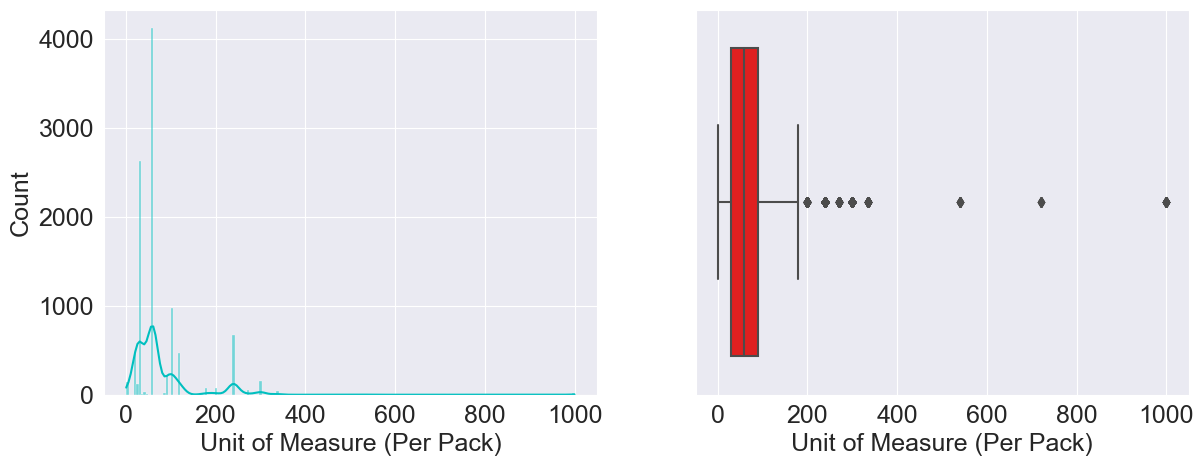

None
Description of Line Item Quantity
----------------------------------------------------------------------------
count     10324.000000
mean      18332.534870
std       40035.302961
min           1.000000
25%         408.000000
50%        3000.000000
75%       17039.750000
max      619999.000000
Name: Line Item Quantity, dtype: float64

 Skewness of Line Item Quantity
----------------------------------------------------------------------------
5.0383

 Histogram and Boxplot of Line Item Quantity
----------------------------------------------------------------------------
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


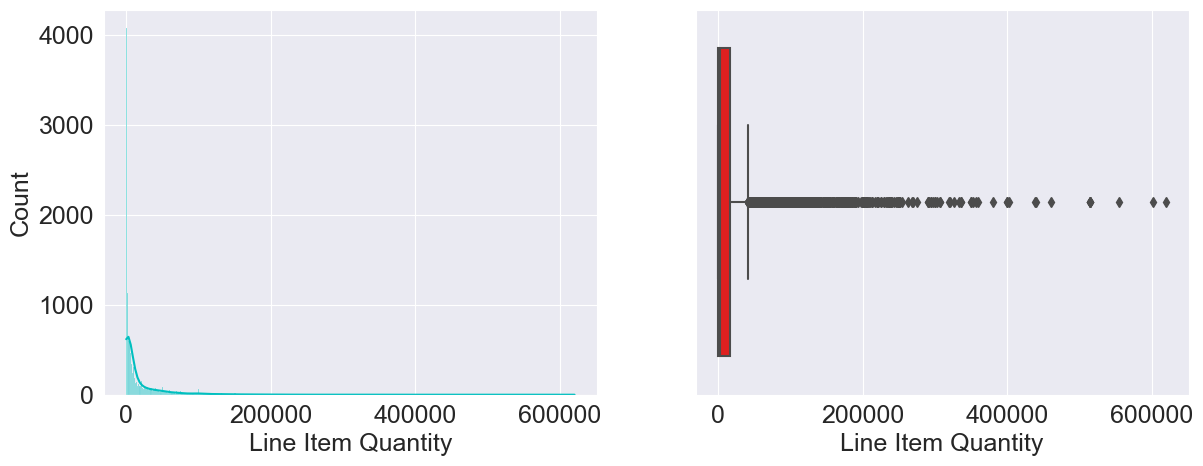

None
Description of Line Item Value
----------------------------------------------------------------------------
count    1.032400e+04
mean     1.576506e+05
std      3.452921e+05
min      0.000000e+00
25%      4.314593e+03
50%      3.047147e+04
75%      1.664471e+05
max      5.951990e+06
Name: Line Item Value, dtype: float64

 Skewness of Line Item Value
----------------------------------------------------------------------------
5.837

 Histogram and Boxplot of Line Item Value
----------------------------------------------------------------------------
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


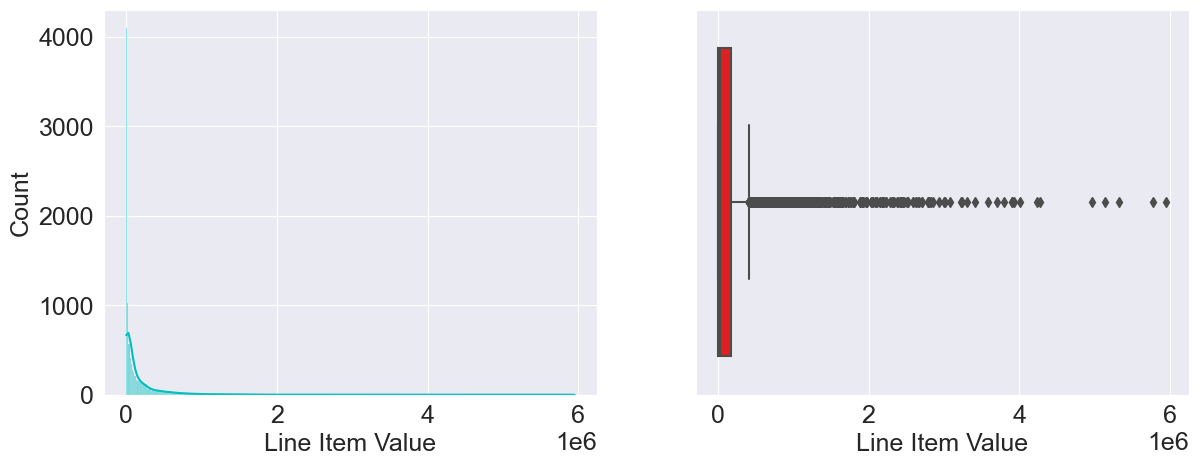

None
Description of Pack Price
----------------------------------------------------------------------------
count    10324.000000
mean        21.910241
std         45.609223
min          0.000000
25%          4.120000
50%          9.300000
75%         23.592500
max       1345.640000
Name: Pack Price, dtype: float64

 Skewness of Pack Price
----------------------------------------------------------------------------
12.9884

 Histogram and Boxplot of Pack Price
----------------------------------------------------------------------------
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


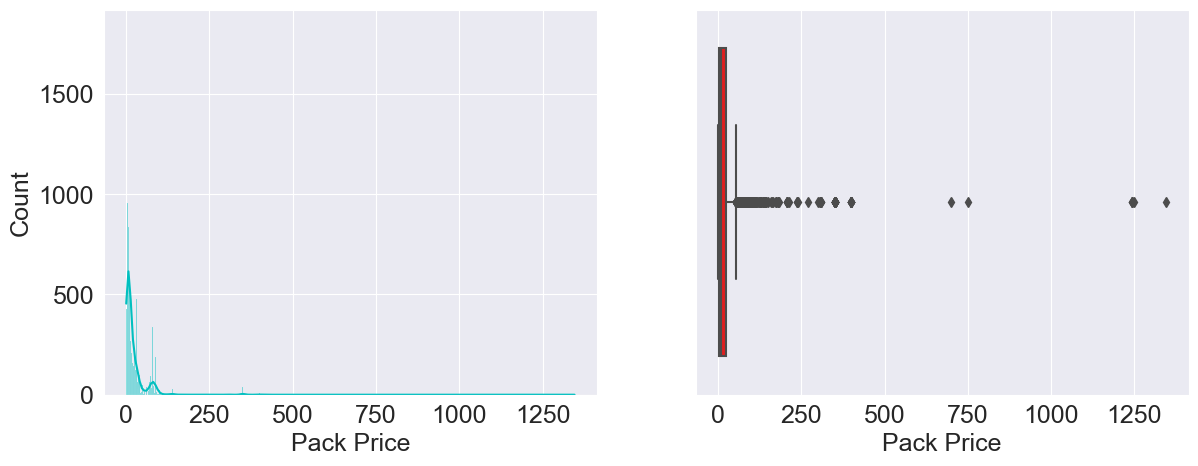

None
Description of Unit Price
----------------------------------------------------------------------------
count    10324.000000
mean         0.611701
std          3.275808
min          0.000000
25%          0.080000
50%          0.160000
75%          0.470000
max        238.650000
Name: Unit Price, dtype: float64

 Skewness of Unit Price
----------------------------------------------------------------------------
40.5848

 Histogram and Boxplot of Unit Price
----------------------------------------------------------------------------
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


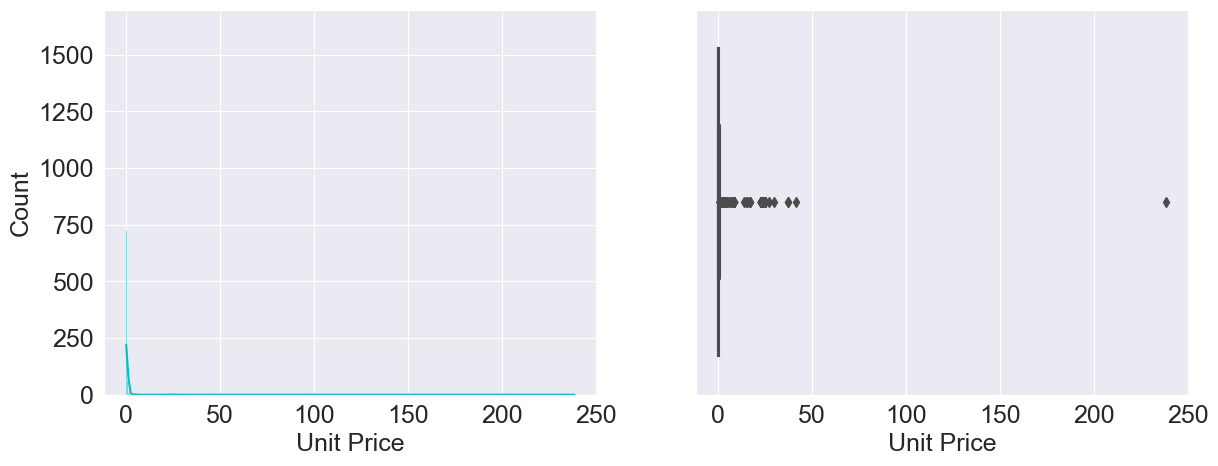

None
Description of Weight (Kilograms)
----------------------------------------------------------------------------
count     10324.00000
mean       4513.33588
std       12376.26464
min           1.00000
25%         394.00000
50%        2093.00000
75%        4513.33588
max      857354.00000
Name: Weight (Kilograms), dtype: float64

 Skewness of Weight (Kilograms)
----------------------------------------------------------------------------
35.1586

 Histogram and Boxplot of Weight (Kilograms)
----------------------------------------------------------------------------
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


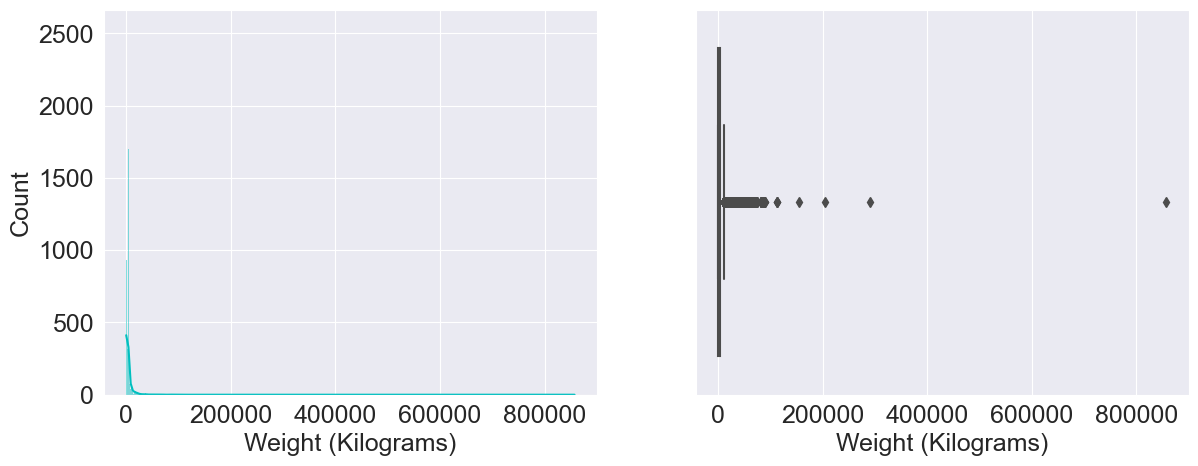

None
Description of Freight Cost (USD)
----------------------------------------------------------------------------
count    1.032400e+04
mean     2.097477e+04
std      9.566603e+04
min      0.000000e+00
25%      2.038550e+03
50%      6.169000e+03
75%      1.592285e+04
max      5.140115e+06
Name: Freight Cost (USD), dtype: float64

 Skewness of Freight Cost (USD)
----------------------------------------------------------------------------
24.1285

 Histogram and Boxplot of Freight Cost (USD)
----------------------------------------------------------------------------
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


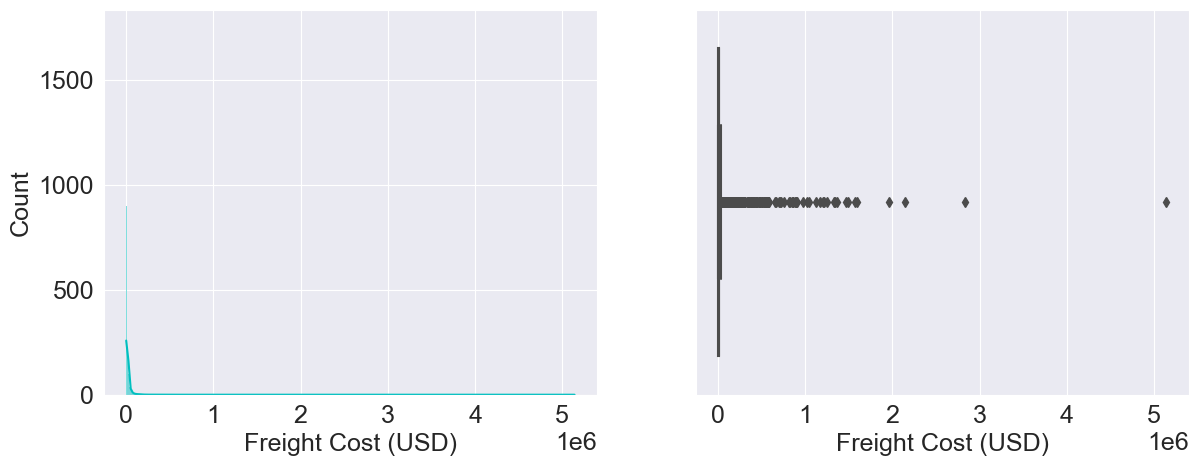

None
Description of Line Item Insurance (USD)
----------------------------------------------------------------------------
count    10324.000000
mean       233.442523
std        494.765813
min          0.000000
25%          5.242500
50%         42.815000
75%        241.750000
max       7708.440000
Name: Line Item Insurance (USD), dtype: float64

 Skewness of Line Item Insurance (USD)
----------------------------------------------------------------------------
4.8863

 Histogram and Boxplot of Line Item Insurance (USD)
----------------------------------------------------------------------------
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


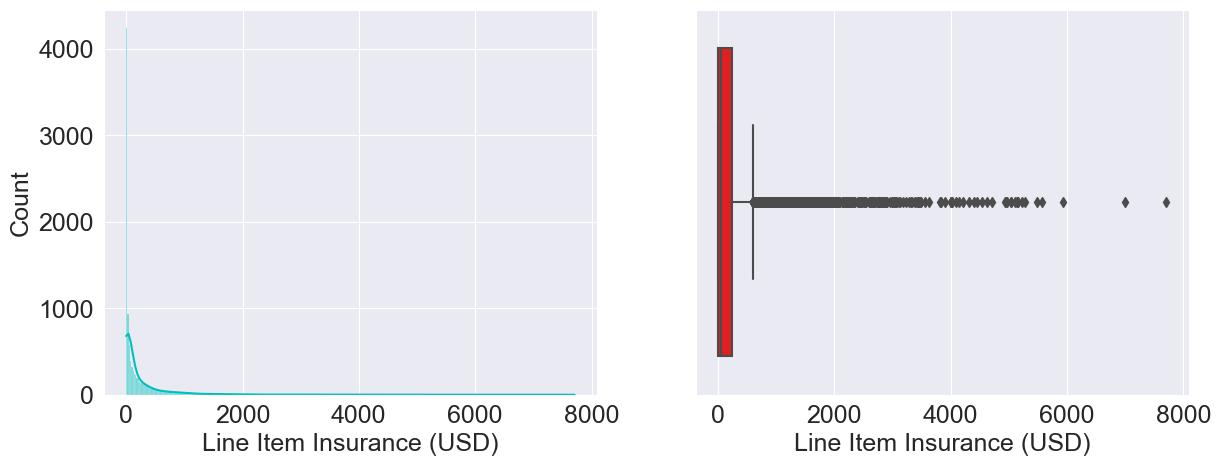

None


In [14]:
for column in df.columns:
    if (df[column].dtype != 'object')and(df[column].dtype != 'datetime64[ns]'):
        print(univariateAnalysis_numeric(column,60))

<Axes: >

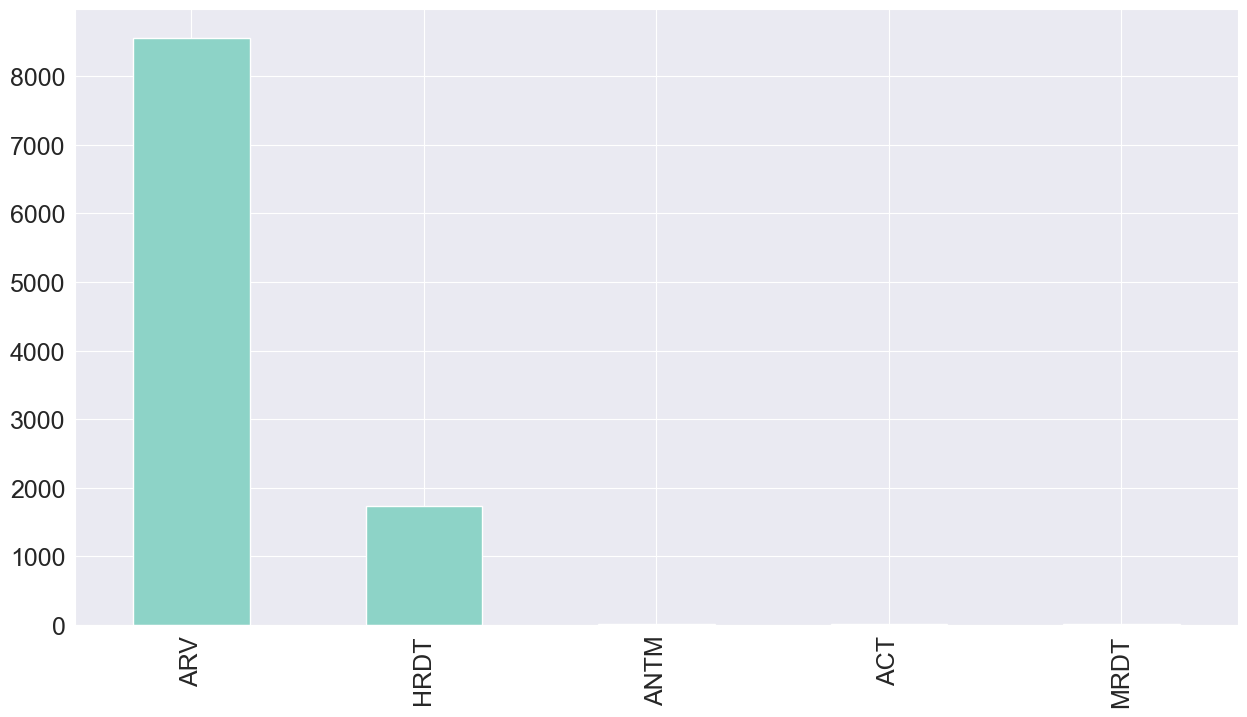

In [15]:
df["Product Group"].value_counts().plot(kind="bar")

<Axes: >

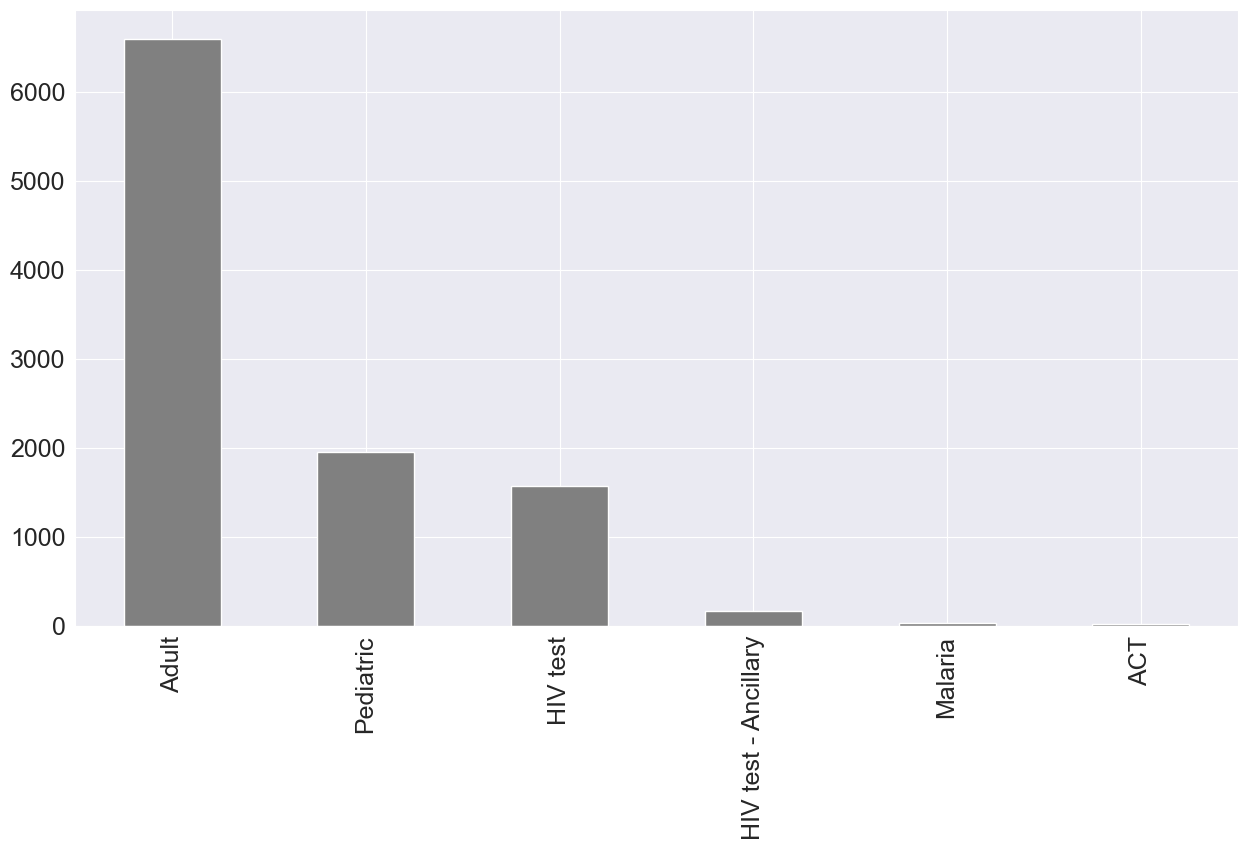

In [16]:
df["Sub Classification"].value_counts().plot(kind="bar", color ='grey')

Text(0.5, 0, 'Country Name')

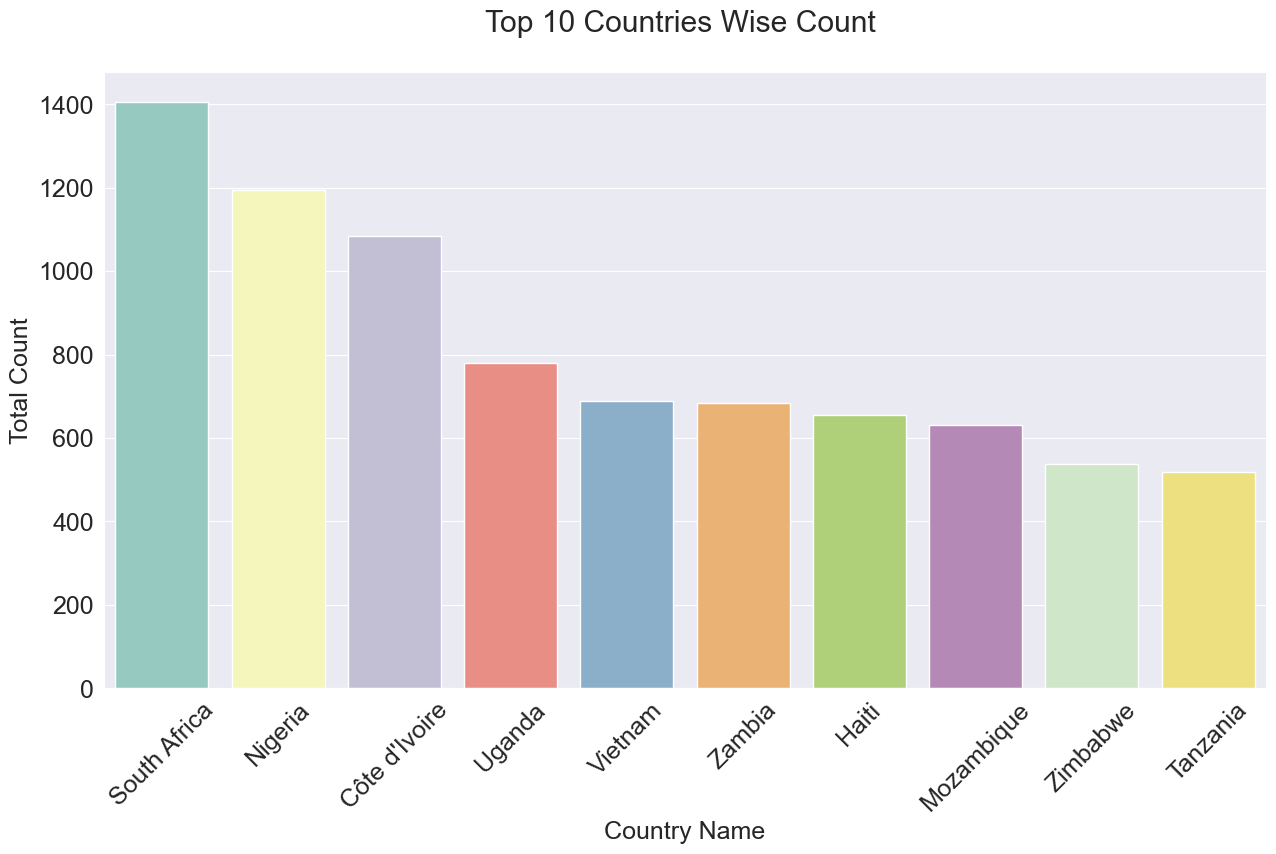

In [17]:
sns.countplot(df,x ='Country',
              order = df['Country'].value_counts().nlargest(10).index)
plt.title('Top 10 Countries Wise Count \n')
plt.xticks(rotation = 45)
plt.ylabel('Total Count')
plt.xlabel('Country Name')

Text(0.5, 0, 'Country Name')

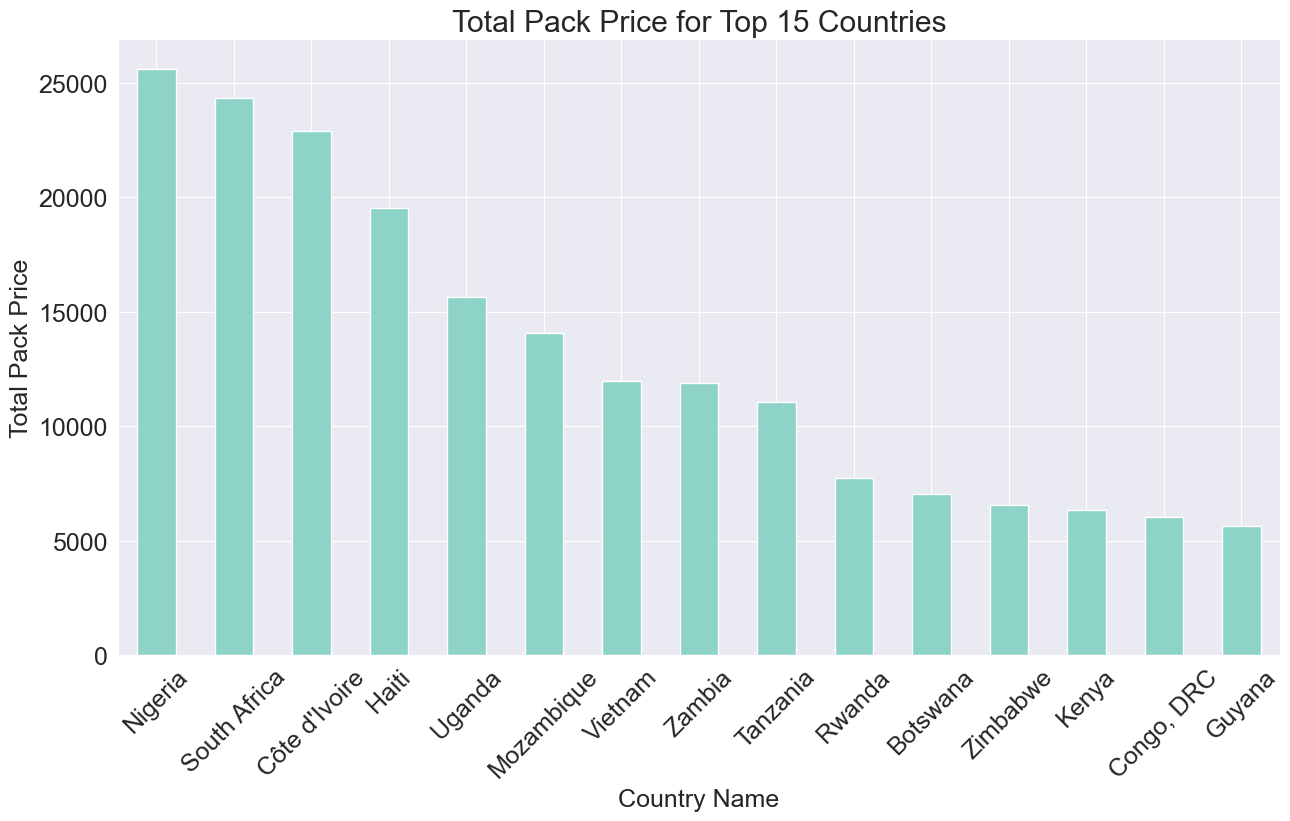

In [18]:
df.groupby(['Country'])['Pack Price'].sum().nlargest(15).plot(kind='bar')
plt.title("Total Pack Price for Top 15 Countries")
plt.xticks(rotation = 45)
plt.ylabel('Total Pack Price')
plt.xlabel('Country Name')

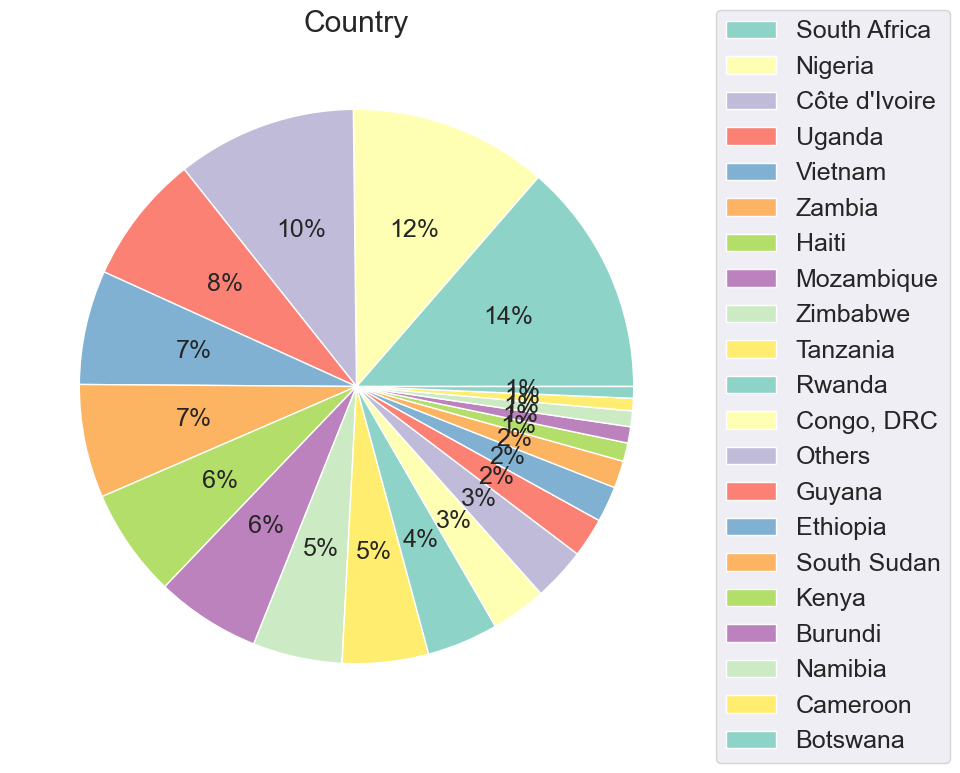

In [19]:
counts = df['Country'].value_counts()
idx = counts[counts.lt(60)].index
df.loc[df['Country'].isin(idx), 'Country'] = 'Others'
df["Country"].value_counts().plot.pie(label='',title="Country",legend=True,figsize=(9,9),autopct='%1.0f%%',labeldistance=None)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

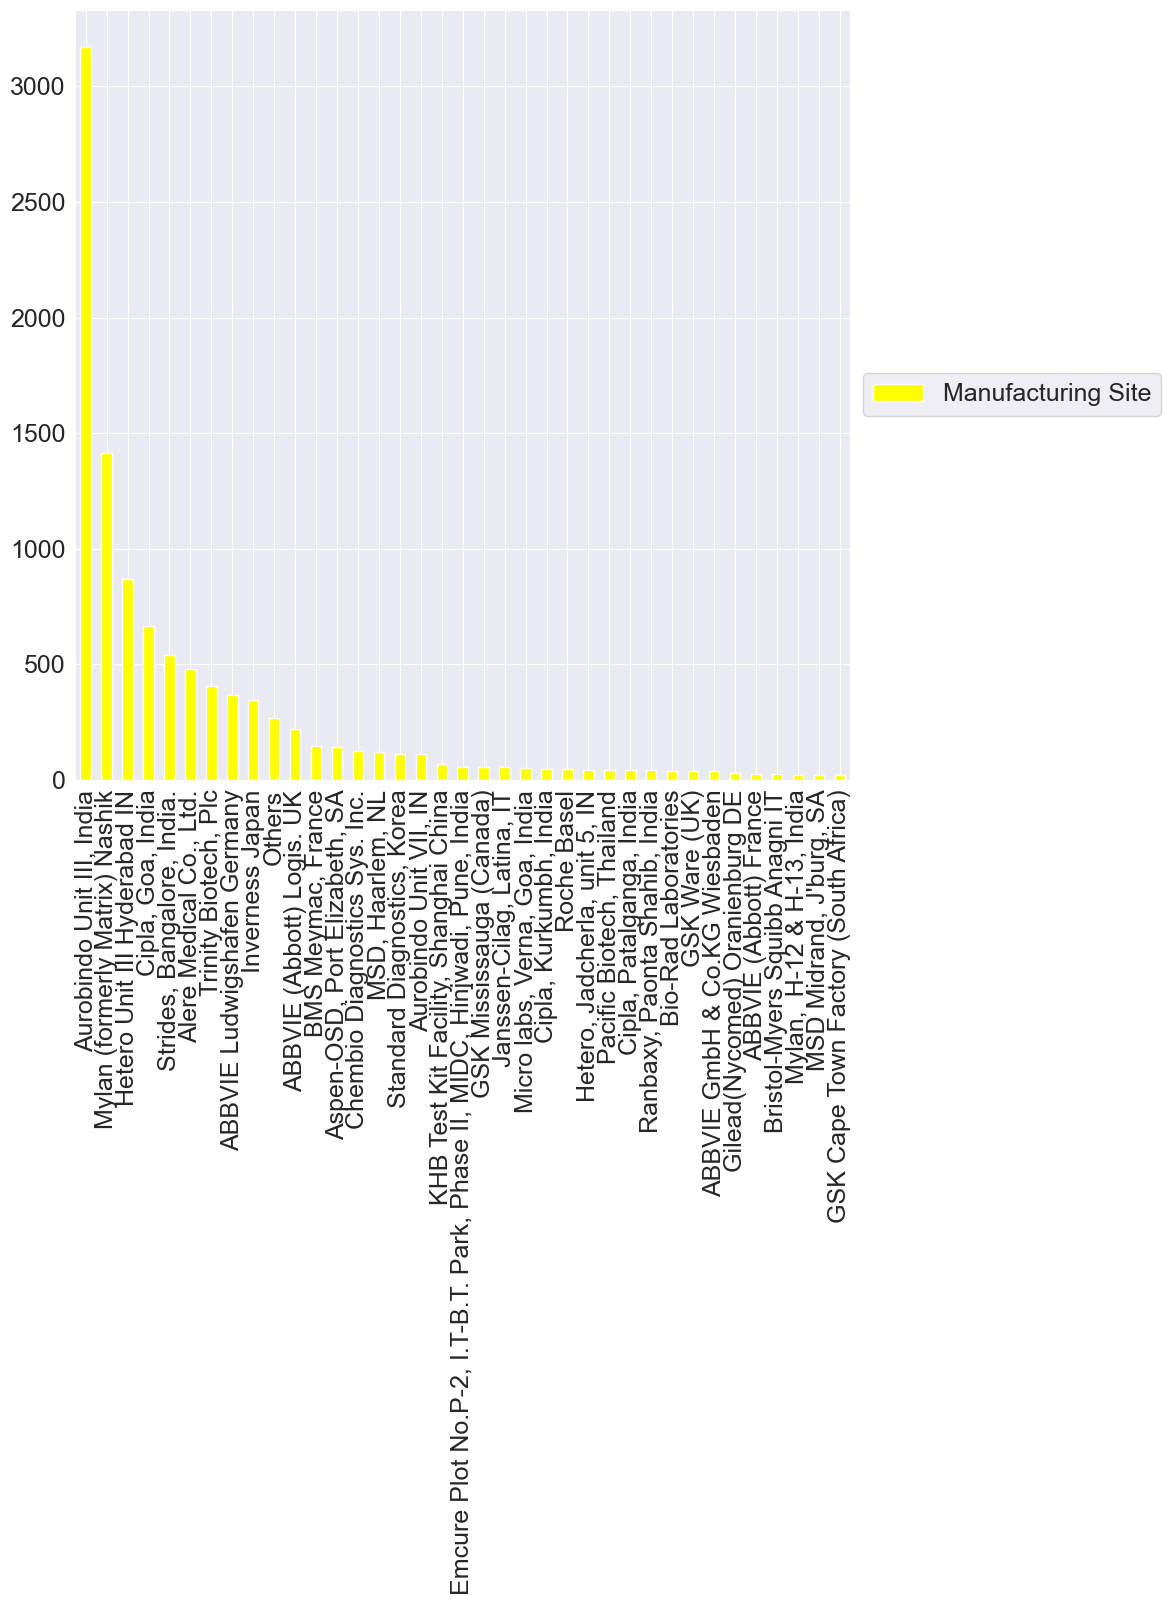

In [20]:
counts = df['Manufacturing Site'].value_counts()
idx = counts[counts.lt(20)].index
df.loc[df['Manufacturing Site'].isin(idx), 'Manufacturing Site'] = 'Others'
df["Manufacturing Site"].value_counts().plot(kind="bar",figsize=(10,10),color ='yellow')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

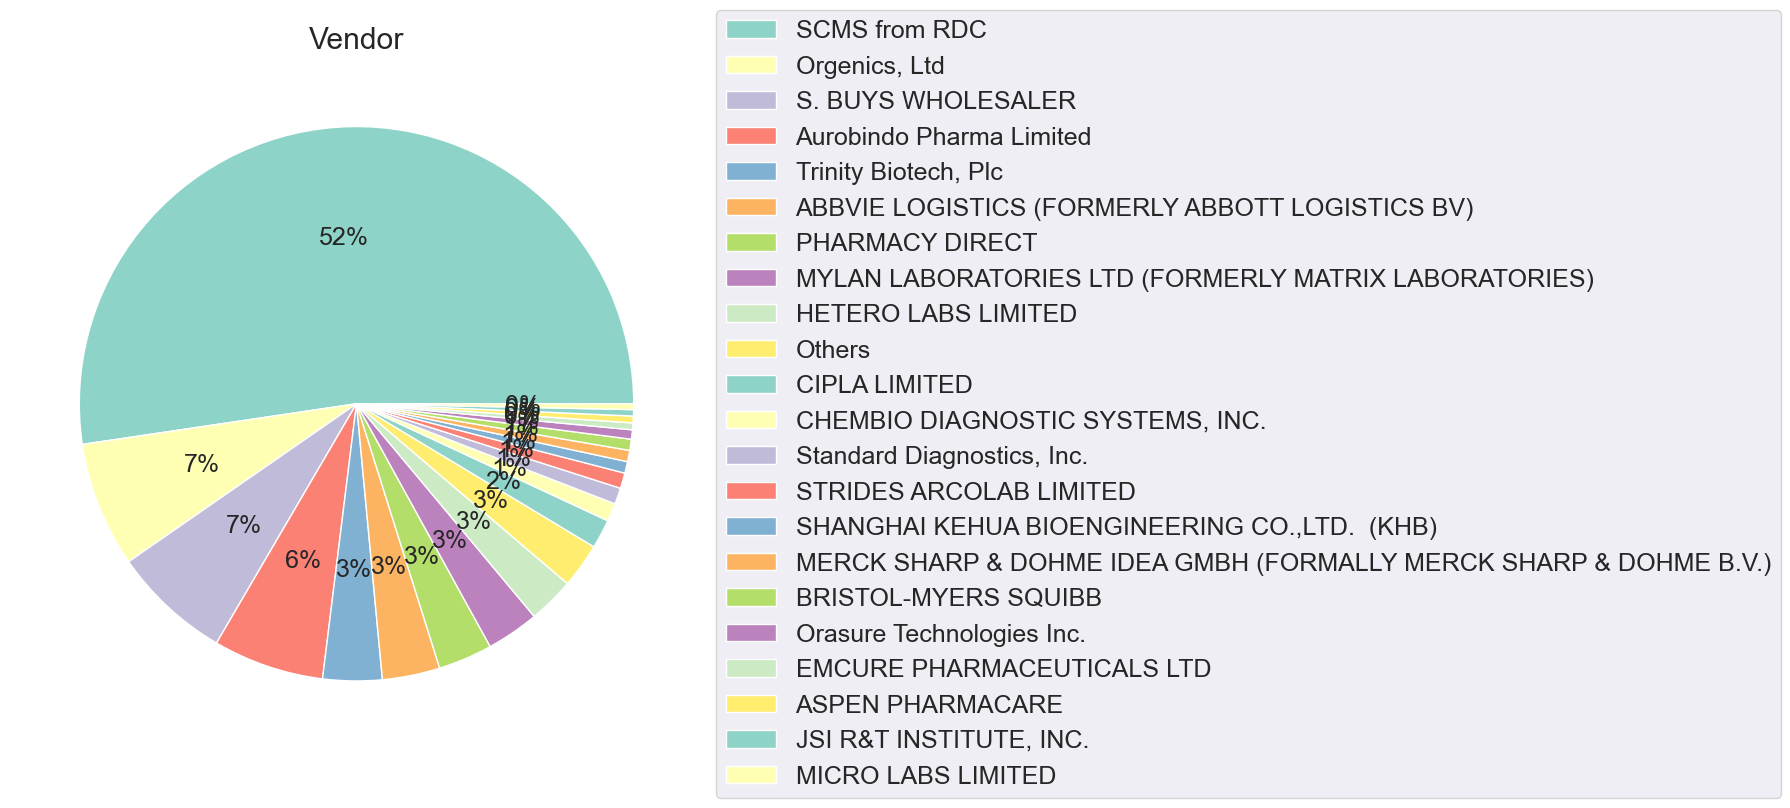

In [21]:
counts = df['Vendor'].value_counts()
idx = counts[counts.lt(30)].index
df.loc[df['Vendor'].isin(idx), 'Vendor'] = 'Others'
df["Vendor"].value_counts().plot.pie(label='',title="Vendor",legend=True,figsize=(9,9),autopct='%1.0f%%',labeldistance=None)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Text(0.5, 0, 'First Line Designation')

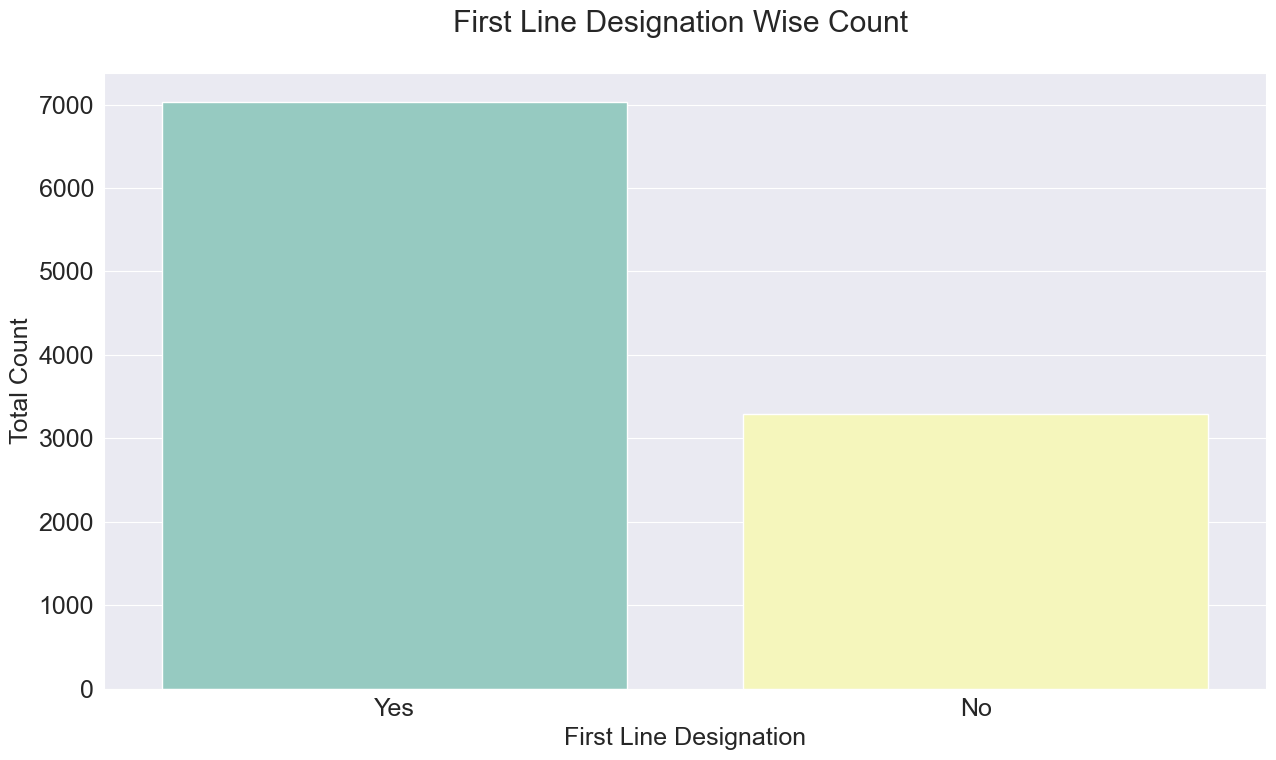

In [22]:
sns.countplot(df,x ="First Line Designation",order = df['First Line Designation'].value_counts().nlargest(10).index)
plt.title('First Line Designation Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('First Line Designation')

In [23]:
print("The sum of Generic Unit Price total is ", df[df['Brand']=='Generic']['Unit Price'].sum())
px.bar(df.groupby('Brand')['Unit Price'].count().sort_values(ascending=False), title='Count of Unit Prices wrt Brands')

The sum of Generic Unit Price total is  1287.3200000000002


In [24]:
px.bar(df.groupby('Brand')['Unit Price'].sum().sort_values(ascending = False), title='Sum of Unit Prices wrt Brands',color_discrete_sequence =['red']*3)

In [25]:
px.bar(df.groupby('Country')['Unit Price'].sum()/df.groupby('Country')['Unit Price'].count(), 
       title='Ratio of Sum to Count of Unit Prices wrt Country')

In [26]:
px.bar(df.groupby('Dosage Form')['Pack Price'].sum().sort_values(ascending = False), title='Sum of Pack Prices wrt Vendor',color_discrete_sequence =['black']*3)

In [27]:
ShippingMode = df["Shipment Mode"].value_counts()
labels = (np.array(ShippingMode.index))
sizes = (np.array((ShippingMode / ShippingMode.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Shipment Mode")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="Shipment Mode")

Manufacturing Site
Aurobindo Unit III, India         3172
Mylan (formerly Matrix) Nashik    1415
Hetero Unit III Hyderabad IN       869
Cipla, Goa, India                  665
Strides, Bangalore, India.         540
Alere Medical Co., Ltd.            481
Trinity Biotech, Plc               405
ABBVIE Ludwigshafen Germany        366
Inverness Japan                    345
Others                             268
dtype: int64


Text(0.5, 0, 'Manufacturing Site Name')

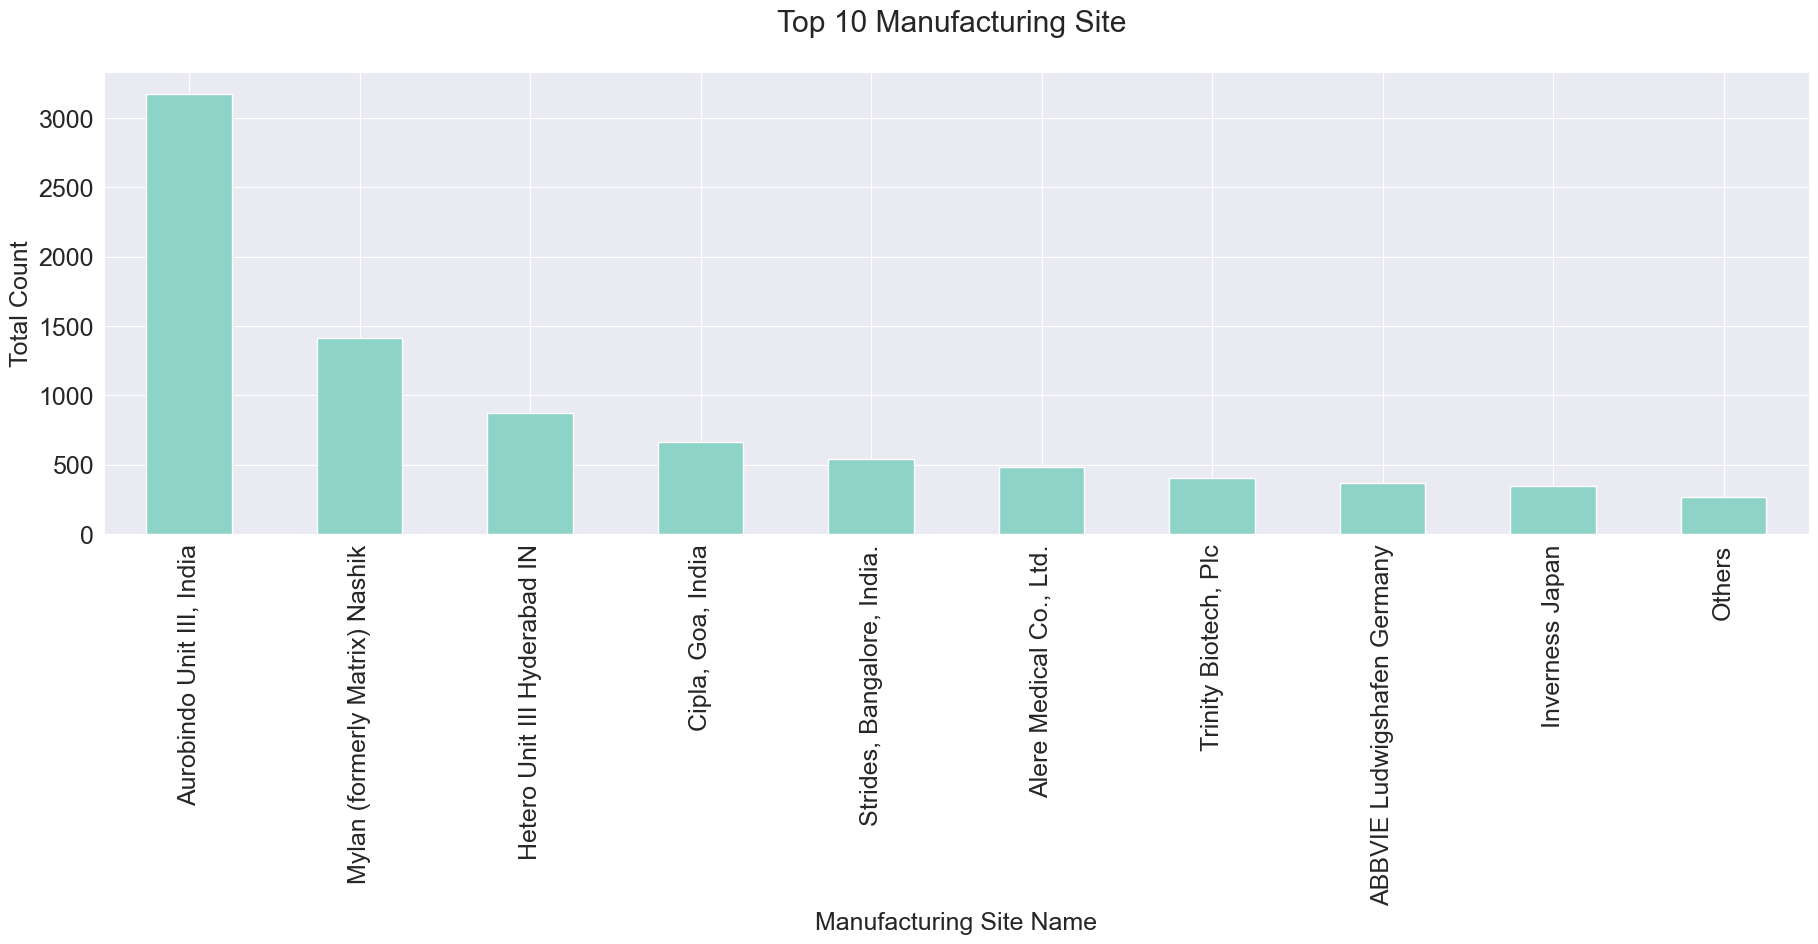

In [28]:
plt.figure(figsize=(22,6))
TopFiveManufacturingSite=df.groupby('Manufacturing Site').size().nlargest(10)
print(TopFiveManufacturingSite)
TopFiveManufacturingSite.plot(kind='bar')
plt.title('Top 10 Manufacturing Site \n')
plt.ylabel('Total Count')
plt.xlabel('Manufacturing Site Name')

Top 10 Air Manufacturing Site 

Aurobindo Unit III, India         1829
Mylan (formerly Matrix) Nashik     701
Alere Medical Co., Ltd.            473
Hetero Unit III Hyderabad IN       418
Trinity Biotech, Plc               392
Inverness Japan                    327
Cipla, Goa, India                  305
ABBVIE Ludwigshafen Germany        295
Strides, Bangalore, India.         262
Others                             193
Name: Manufacturing Site, dtype: int64


Text(0.5, 0, 'Manufacturing Site')

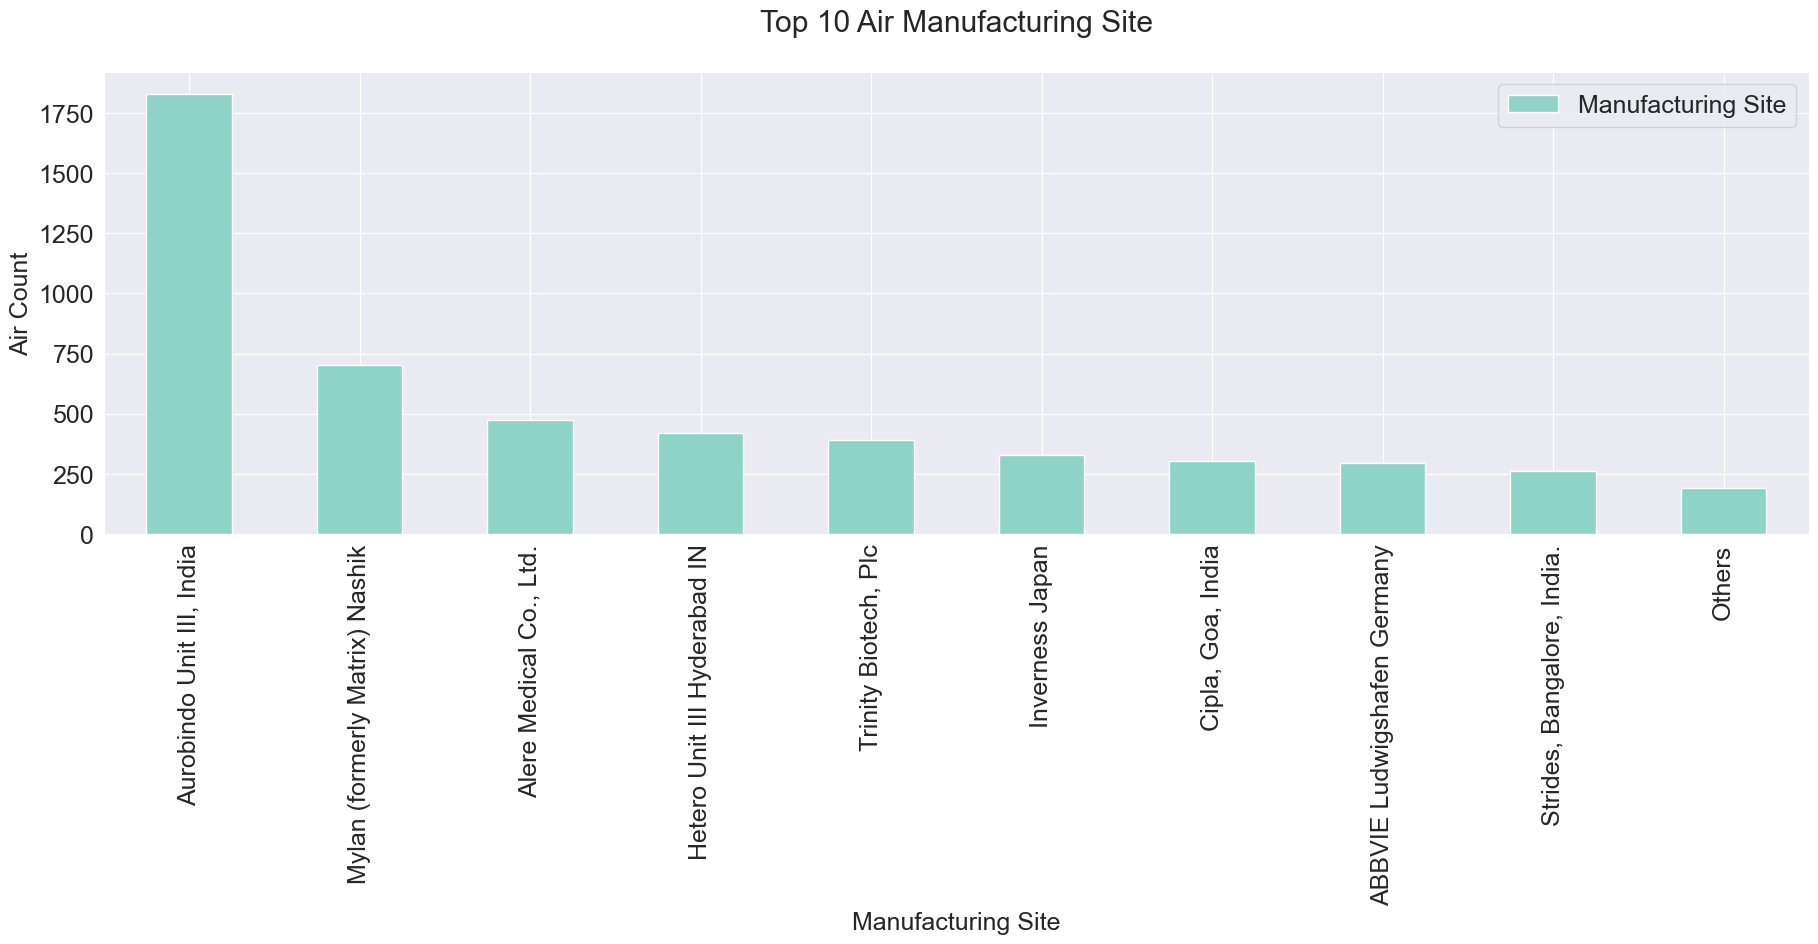

In [29]:
# Top 10 Air Shipment Mode in Bar Chart
ItemData=df[df['Shipment Mode']=='Air']
df[df["Shipment Mode"]=='Air']['Manufacturing Site'].value_counts()[0:10].to_frame().plot.bar(figsize=(22,6))
ItemSupplier = df[df["Shipment Mode"]=='Air']['Manufacturing Site'].value_counts()[0:10]
print("Top 10 Air Manufacturing Site \n")
print(ItemSupplier)
plt.title('Top 10 Air Manufacturing Site\n')
plt.ylabel('Air Count')
plt.xlabel('Manufacturing Site')

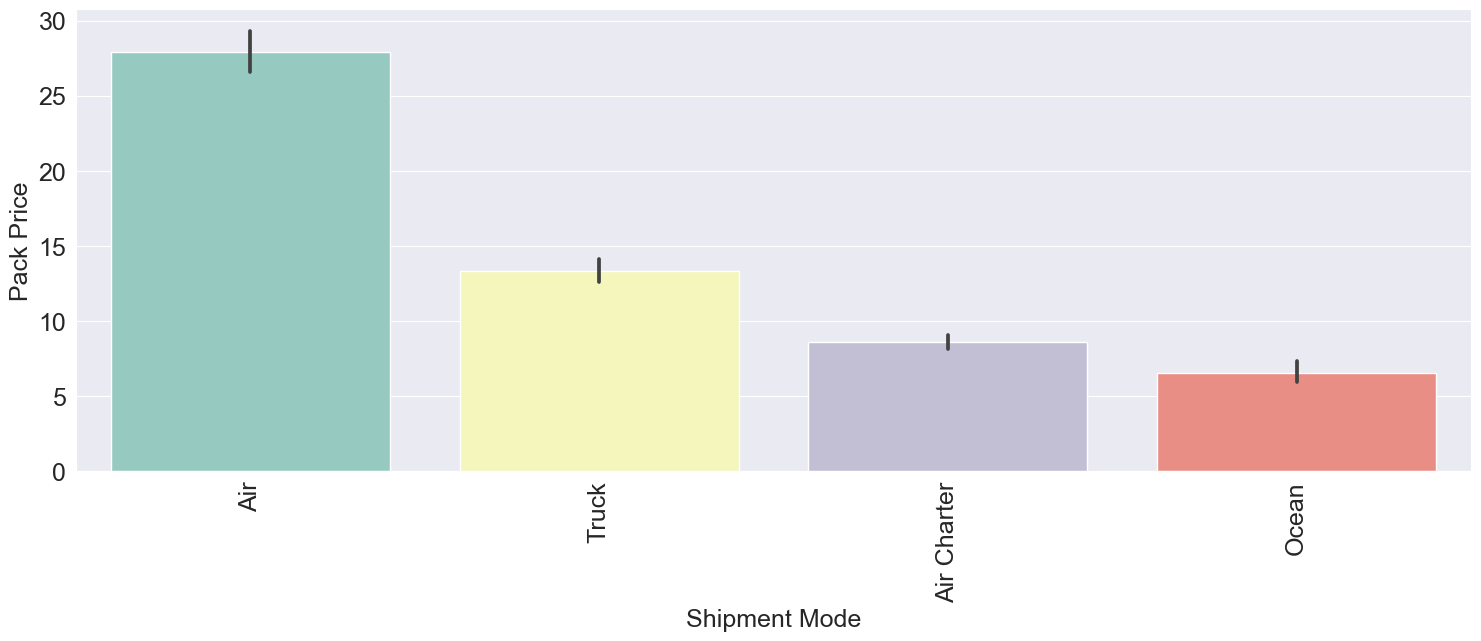

In [30]:
plt.subplots(figsize = (18,6))
plt.xticks(rotation = 90)
sns.barplot(x='Shipment Mode',y= 'Pack Price', data = df)
plt.show()

# Feature engineering

In [31]:
new_df = df.copy()

In [32]:
# function to apply yeo-johnson transformation to a column
from sklearn.preprocessing import PowerTransformer
def yeo_johnson_transformation(df, column):
    # create a yeo-johnson transformer
    transformer = PowerTransformer(method='yeo-johnson', standardize=True)
    # fit the transformer to the data
    transformer.fit(df[[column]])
    # transform the data
    df[column] = transformer.transform(df[[column]])

# apply the transforms for all the numeric variables except the target variable
numeric_cols = new_df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    if col != 'Freight Cost (USD)':
        yeo_johnson_transformation(new_df, col)

# label encode the categorical variables and replace them in the original dataframe
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_cols = new_df.select_dtypes(include=['object']).columns
for col in cat_cols:
    new_df[col] = le.fit_transform(new_df[col])


In [33]:
new_df[['Country','Managed By','Fulfill Via','Vendor INCO Term','Shipment Mode','Product Group','Sub Classification','Vendor',]]

,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,Product Group,Sub Classification,Vendor
0,4,2,0,5,0,3,2,14
1,18,2,0,5,0,2,5,2
2,4,2,0,6,0,3,2,14
3,18,2,0,5,0,2,1,14
4,18,2,0,5,0,2,1,2
...,...,...,...,...,...,...,...,...
10319,20,2,1,7,3,2,5,17
10320,4,2,1,7,3,2,1,17
10321,19,2,1,7,3,2,1,17
10322,20,2,1,7,3,2,1,17


In [34]:
# use dbscan to find the outliers
from sklearn.cluster import DBSCAN
# model_dbscan = DBSCAN(eps=0.5, min_samples=20).fit(new_df)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df.drop('Freight Cost (USD)', axis=1), new_df['Freight Cost (USD)'], test_size=0.2, random_state=42)
model_dbscan = DBSCAN(eps=10000, min_samples=1000).fit(new_df)
# predict the cluster for each data 10point
y_pred = model_dbscan.fit_predict(new_df)
# create a dataframe containing the predicted cluster
df_cluster = pd.DataFrame(y_pred, columns=['cluster'])
# concatenate the cluster dataframe with the original dataframe
X_train_new = pd.concat([new_df.reset_index(drop=True), df_cluster], axis=1)
X_train_new.head()


,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),cluster
0,3,1236,1982,3303,4,2,0,5,0,764,895,748,787,768,3,2,14,98,55,33,33,15,-0.843150,-1.654936,-1.369300,0.916493,1.512786,30,1,-1.942205,780.34,-1.623112,0
1,65,1236,336,3365,18,2,0,5,0,764,895,370,384,373,2,5,2,143,74,15,2,8,1.931421,-0.421703,-0.616172,-0.394556,-1.178592,6,1,-0.779695,4521.50,-1.623112,0
2,3,1236,1058,538,4,2,0,6,0,764,895,1224,1293,1255,3,2,14,70,27,11,33,15,0.687094,-0.670369,0.114640,1.649407,1.351168,2,1,-1.095141,1653.78,-1.623112,0
3,65,1236,2616,2796,18,2,0,5,0,764,895,51,51,49,2,1,14,104,57,15,13,10,0.012292,1.064442,0.648694,-0.789346,-0.866802,32,1,0.064303,16007.06,-1.623112,0
4,65,1236,2631,2896,18,2,0,5,0,764,895,135,133,125,2,1,2,169,82,15,34,0,0.012292,1.151329,0.626042,-0.984119,-1.017348,6,1,0.974018,45450.08,-1.623112,-1


In [35]:
x=df.drop(columns=['Project Code', 'PQ First Sent to Client Date',
       'PO Sent to Vendor Date', 'Scheduled Delivery Date',
       'Delivered to Client Date', 'Delivery Recorded Date',
       'Item Description','PQ #', 'PO / SO #', 'ASN/DN #'])
y=df['Freight Cost (USD)']

In [36]:
x=pd.get_dummies(x,drop_first=True)
x

,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Country_Burundi,Country_Cameroon,"Country_Congo, DRC",Country_Côte d'Ivoire,Country_Ethiopia,Country_Guyana,Country_Haiti,Country_Kenya,Country_Mozambique,Country_Namibia,Country_Nigeria,Country_Others,Country_Rwanda,Country_South Africa,Country_South Sudan,Country_Tanzania,Country_Uganda,Country_Vietnam,Country_Zambia,Country_Zimbabwe,Managed By_Haiti Field Office,Managed By_PMO - US,Managed By_South Africa Field Office,Fulfill Via_From RDC,Vendor INCO Term_CIP,Vendor INCO Term_DAP,Vendor INCO Term_DDP,Vendor INCO Term_DDU,Vendor INCO Term_EXW,Vendor INCO Term_FCA,Vendor INCO Term_N/A - From RDC,Shipment Mode_Air Charter,Shipment Mode_Ocean,Shipment Mode_Truck,Product Group_ANTM,Product Group_ARV,Product Group_HRDT,Product Group_MRDT,Sub Classification_Adult,Sub Classification_HIV test,Sub Classification_HIV test - Ancillary,Sub Classification_Malaria,Sub Classification_Pediatric,Vendor_ASPEN PHARMACARE,Vendor_Aurobindo Pharma Limited,Vendor_BRISTOL-MYERS SQUIBB,"Vendor_CHEMBIO DIAGNOSTIC SYSTEMS, INC.",Vendor_CIPLA LIMITED,Vendor_EMCURE PHARMACEUTICALS LTD,Vendor_HETERO LABS LIMITED,"Vendor_JSI R&T INSTITUTE, INC.",Vendor_MERCK SHARP & DOHME IDEA GMBH (FORMALLY MERCK SHARP & DOHME B.V.),Vendor_MICRO LABS LIMITED,Vendor_MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORATORIES),Vendor_Orasure Technologies Inc.,"Vendor_Orgenics, Ltd",Vendor_Others,Vendor_PHARMACY DIRECT,Vendor_S. BUYS WHOLESALER,Vendor_SCMS from RDC,"Vendor_SHANGHAI KEHUA BIOENGINEERING CO.,LTD. (KHB)",Vendor_STRIDES ARCOLAB LIMITED,"Vendor_Standard Diagnostics, Inc.","Vendor_Trinity Biotech, Plc",Molecule/Test Type_Abacavir/Lamivudine,Molecule/Test Type_Abacavir/Lamivudine/Zidovudine,Molecule/Test Type_Artemether/Lumefantrine,Molecule/Test Type_Artesunate+Amodiaquine,Molecule/Test Type_Atazanavir,Molecule/Test Type_Atazanavir/Ritonavir,"Molecule/Test Type_Chase Buffer, Determine, 100 Tests, 2.5ml x 1 Vial",Molecule/Test Type_Chloroquine base (as phosphate),Molecule/Test Type_Darunavir,Molecule/Test Type_Didanosine,Molecule/Test Type_Didanosine EC,Molecule/Test Type_Efavirenz,Molecule/Test Type_Efavirenz/Emtricitabine/Tenofovir Disoproxil Fumarate,Molecule/Test Type_Efavirenz/Lamivudine/Tenofovir Disoproxil Fumarate,Molecule/Test Type_Emtricitabine/Tenofovir Disoproxil Fumarate,Molecule/Test Type_Etravirine,"Molecule/Test Type_HIV 1, Uni-Gold Recombigen HIV Control, Vial 2 x 0.5 ml","Molecule/Test Type_HIV 1/2, Bioline 3.0 Diluent, 25 Tests","Molecule/Test Type_HIV 1/2, Bioline 3.0 Kit","Molecule/Test Type_HIV 1/2, Bioline 3.0 Kit (no accessories)","Molecule/Test Type_HIV 1/2, Bioline 3.0 Kit, Lancets, Capillary pipets, Alcohol swabs included","Molecule/Test Type_HIV 1/2, Bundi Rapid HIV Kit","Molecule/Test Type_HIV 1/2, Capillus HIV Kit","Molecule/Test Type_HIV 1/2, Clearview Complete Kit","Molecule/Test Type_HIV 1/2, Colloidal Gold, Diagnostic Kit Set (includes lancet, transfer pipette & alcohol prep pad)","Molecule/Test Type_HIV 1/2, Colloidal Gold, Diagnostic Kit, Antibody","Molecule/Test Type_HIV 1/2, Determine Complete HIV Kit","Molecule/Test Type_HIV 1/2, Determine HIV Kit, without Lancets","Molecule/Test Type_HIV 1/2, Determine Kit without Lancets, Buffer or Capillary Tubes, 100 Tests","Molecule/Test Type_HIV 1/2, DoubleCheck Gold Kit","Molecule/Test Type_HIV 1/2, DoubleCheck II Kit","Molecule/Test Type_HIV 1/2, Genie III Kit","Molecule/Test Type_HIV 1/2, HEXAGON Rapid HIV Kit","Molecule/Test Type_HIV 1/2, INSTI HIV 1/2 Antibody Kit","Molecule/Test Type_HIV 1/2, INSTI HIV Antibody Individual POC, 1 Test","Molecule/Test Type_HIV 1/2, ImmunoComb II BiSpot EIA Kit","Molecule/Test Type_HIV 1/2, ImmunoComb TriSpot Ag - Ab Kit","Molecule/Test Type_HIV 1/2, InstantChek HIV 1+2 Kit","Molecule/Test Type_HIV 1/2, OraQuick Advance HIV Rapid Antibody Kit","Molecule/Test Type_HIV 1/2, OraQuick Rapid Antibody Kit","Molecule/

In [37]:
# use dbscan to find the outliers
from sklearn.cluster import DBSCAN
# model_dbscan = DBSCAN(eps=0.5, min_samples=20).fit(new_df)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_dbscan = DBSCAN(eps=50000, min_samples=1000).fit(x)
# predict the cluster for each data 10point
y_pred = model_dbscan.fit_predict(x)
# create a dataframe containing the predicted cluster
df_cluster = pd.DataFrame(y_pred, columns=['cluster'])
# concatenate the cluster dataframe with the original dataframe
X_train_new = pd.concat([x.reset_index(drop=True), df_cluster], axis=1)
X_train_new.head()

,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Country_Burundi,Country_Cameroon,"Country_Congo, DRC",Country_Côte d'Ivoire,Country_Ethiopia,Country_Guyana,Country_Haiti,Country_Kenya,Country_Mozambique,Country_Namibia,Country_Nigeria,Country_Others,Country_Rwanda,Country_South Africa,Country_South Sudan,Country_Tanzania,Country_Uganda,Country_Vietnam,Country_Zambia,Country_Zimbabwe,Managed By_Haiti Field Office,Managed By_PMO - US,Managed By_South Africa Field Office,Fulfill Via_From RDC,Vendor INCO Term_CIP,Vendor INCO Term_DAP,Vendor INCO Term_DDP,Vendor INCO Term_DDU,Vendor INCO Term_EXW,Vendor INCO Term_FCA,Vendor INCO Term_N/A - From RDC,Shipment Mode_Air Charter,Shipment Mode_Ocean,Shipment Mode_Truck,Product Group_ANTM,Product Group_ARV,Product Group_HRDT,Product Group_MRDT,Sub Classification_Adult,Sub Classification_HIV test,Sub Classification_HIV test - Ancillary,Sub Classification_Malaria,Sub Classification_Pediatric,Vendor_ASPEN PHARMACARE,Vendor_Aurobindo Pharma Limited,Vendor_BRISTOL-MYERS SQUIBB,"Vendor_CHEMBIO DIAGNOSTIC SYSTEMS, INC.",Vendor_CIPLA LIMITED,Vendor_EMCURE PHARMACEUTICALS LTD,Vendor_HETERO LABS LIMITED,"Vendor_JSI R&T INSTITUTE, INC.",Vendor_MERCK SHARP & DOHME IDEA GMBH (FORMALLY MERCK SHARP & DOHME B.V.),Vendor_MICRO LABS LIMITED,Vendor_MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORATORIES),Vendor_Orasure Technologies Inc.,"Vendor_Orgenics, Ltd",Vendor_Others,Vendor_PHARMACY DIRECT,Vendor_S. BUYS WHOLESALER,Vendor_SCMS from RDC,"Vendor_SHANGHAI KEHUA BIOENGINEERING CO.,LTD. (KHB)",Vendor_STRIDES ARCOLAB LIMITED,"Vendor_Standard Diagnostics, Inc.","Vendor_Trinity Biotech, Plc",Molecule/Test Type_Abacavir/Lamivudine,Molecule/Test Type_Abacavir/Lamivudine/Zidovudine,Molecule/Test Type_Artemether/Lumefantrine,Molecule/Test Type_Artesunate+Amodiaquine,Molecule/Test Type_Atazanavir,Molecule/Test Type_Atazanavir/Ritonavir,"Molecule/Test Type_Chase Buffer, Determine, 100 Tests, 2.5ml x 1 Vial",Molecule/Test Type_Chloroquine base (as phosphate),Molecule/Test Type_Darunavir,Molecule/Test Type_Didanosine,Molecule/Test Type_Didanosine EC,Molecule/Test Type_Efavirenz,Molecule/Test Type_Efavirenz/Emtricitabine/Tenofovir Disoproxil Fumarate,Molecule/Test Type_Efavirenz/Lamivudine/Tenofovir Disoproxil Fumarate,Molecule/Test Type_Emtricitabine/Tenofovir Disoproxil Fumarate,Molecule/Test Type_Etravirine,"Molecule/Test Type_HIV 1, Uni-Gold Recombigen HIV Control, Vial 2 x 0.5 ml","Molecule/Test Type_HIV 1/2, Bioline 3.0 Diluent, 25 Tests","Molecule/Test Type_HIV 1/2, Bioline 3.0 Kit","Molecule/Test Type_HIV 1/2, Bioline 3.0 Kit (no accessories)","Molecule/Test Type_HIV 1/2, Bioline 3.0 Kit, Lancets, Capillary pipets, Alcohol swabs included","Molecule/Test Type_HIV 1/2, Bundi Rapid HIV Kit","Molecule/Test Type_HIV 1/2, Capillus HIV Kit","Molecule/Test Type_HIV 1/2, Clearview Complete Kit","Molecule/Test Type_HIV 1/2, Colloidal Gold, Diagnostic Kit Set (includes lancet, transfer pipette & alcohol prep pad)","Molecule/Test Type_HIV 1/2, Colloidal Gold, Diagnostic Kit, Antibody","Molecule/Test Type_HIV 1/2, Determine Complete HIV Kit","Molecule/Test Type_HIV 1/2, Determine HIV Kit, without Lancets","Molecule/Test Type_HIV 1/2, Determine Kit without Lancets, Buffer or Capillary Tubes, 100 Tests","Molecule/Test Type_HIV 1/2, DoubleCheck Gold Kit","Molecule/Test Type_HIV 1/2, DoubleCheck II Kit","Molecule/Test Type_HIV 1/2, Genie III Kit","Molecule/Test Type_HIV 1/2, HEXAGON Rapid HIV Kit","Molecule/Test Type_HIV 1/2, INSTI HIV 1/2 Antibody Kit","Molecule/Test Type_HIV 1/2, INSTI HIV Antibody Individual POC, 1 Test","Molecule/Test Type_HIV 1/2, ImmunoComb II BiSpot EIA Kit","Molecule/Test Type_HIV 1/2, ImmunoComb TriSpot Ag - Ab Kit","Molecule/Test Type_HIV 1/2, InstantChek HIV 1+2 Kit","Molecule/Test Type_HIV 1/2, OraQuick Advance HIV Rapid Antibody Kit","Molecule/Test Type_HIV 1/2, OraQuick Rapid Antibody Kit","Molecule/

In [38]:
clean_df = X_train_new[X_train_new['cluster'] == 0]

In [39]:
clean_df.head()

,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Country_Burundi,Country_Cameroon,"Country_Congo, DRC",Country_Côte d'Ivoire,Country_Ethiopia,Country_Guyana,Country_Haiti,Country_Kenya,Country_Mozambique,Country_Namibia,Country_Nigeria,Country_Others,Country_Rwanda,Country_South Africa,Country_South Sudan,Country_Tanzania,Country_Uganda,Country_Vietnam,Country_Zambia,Country_Zimbabwe,Managed By_Haiti Field Office,Managed By_PMO - US,Managed By_South Africa Field Office,Fulfill Via_From RDC,Vendor INCO Term_CIP,Vendor INCO Term_DAP,Vendor INCO Term_DDP,Vendor INCO Term_DDU,Vendor INCO Term_EXW,Vendor INCO Term_FCA,Vendor INCO Term_N/A - From RDC,Shipment Mode_Air Charter,Shipment Mode_Ocean,Shipment Mode_Truck,Product Group_ANTM,Product Group_ARV,Product Group_HRDT,Product Group_MRDT,Sub Classification_Adult,Sub Classification_HIV test,Sub Classification_HIV test - Ancillary,Sub Classification_Malaria,Sub Classification_Pediatric,Vendor_ASPEN PHARMACARE,Vendor_Aurobindo Pharma Limited,Vendor_BRISTOL-MYERS SQUIBB,"Vendor_CHEMBIO DIAGNOSTIC SYSTEMS, INC.",Vendor_CIPLA LIMITED,Vendor_EMCURE PHARMACEUTICALS LTD,Vendor_HETERO LABS LIMITED,"Vendor_JSI R&T INSTITUTE, INC.",Vendor_MERCK SHARP & DOHME IDEA GMBH (FORMALLY MERCK SHARP & DOHME B.V.),Vendor_MICRO LABS LIMITED,Vendor_MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORATORIES),Vendor_Orasure Technologies Inc.,"Vendor_Orgenics, Ltd",Vendor_Others,Vendor_PHARMACY DIRECT,Vendor_S. BUYS WHOLESALER,Vendor_SCMS from RDC,"Vendor_SHANGHAI KEHUA BIOENGINEERING CO.,LTD. (KHB)",Vendor_STRIDES ARCOLAB LIMITED,"Vendor_Standard Diagnostics, Inc.","Vendor_Trinity Biotech, Plc",Molecule/Test Type_Abacavir/Lamivudine,Molecule/Test Type_Abacavir/Lamivudine/Zidovudine,Molecule/Test Type_Artemether/Lumefantrine,Molecule/Test Type_Artesunate+Amodiaquine,Molecule/Test Type_Atazanavir,Molecule/Test Type_Atazanavir/Ritonavir,"Molecule/Test Type_Chase Buffer, Determine, 100 Tests, 2.5ml x 1 Vial",Molecule/Test Type_Chloroquine base (as phosphate),Molecule/Test Type_Darunavir,Molecule/Test Type_Didanosine,Molecule/Test Type_Didanosine EC,Molecule/Test Type_Efavirenz,Molecule/Test Type_Efavirenz/Emtricitabine/Tenofovir Disoproxil Fumarate,Molecule/Test Type_Efavirenz/Lamivudine/Tenofovir Disoproxil Fumarate,Molecule/Test Type_Emtricitabine/Tenofovir Disoproxil Fumarate,Molecule/Test Type_Etravirine,"Molecule/Test Type_HIV 1, Uni-Gold Recombigen HIV Control, Vial 2 x 0.5 ml","Molecule/Test Type_HIV 1/2, Bioline 3.0 Diluent, 25 Tests","Molecule/Test Type_HIV 1/2, Bioline 3.0 Kit","Molecule/Test Type_HIV 1/2, Bioline 3.0 Kit (no accessories)","Molecule/Test Type_HIV 1/2, Bioline 3.0 Kit, Lancets, Capillary pipets, Alcohol swabs included","Molecule/Test Type_HIV 1/2, Bundi Rapid HIV Kit","Molecule/Test Type_HIV 1/2, Capillus HIV Kit","Molecule/Test Type_HIV 1/2, Clearview Complete Kit","Molecule/Test Type_HIV 1/2, Colloidal Gold, Diagnostic Kit Set (includes lancet, transfer pipette & alcohol prep pad)","Molecule/Test Type_HIV 1/2, Colloidal Gold, Diagnostic Kit, Antibody","Molecule/Test Type_HIV 1/2, Determine Complete HIV Kit","Molecule/Test Type_HIV 1/2, Determine HIV Kit, without Lancets","Molecule/Test Type_HIV 1/2, Determine Kit without Lancets, Buffer or Capillary Tubes, 100 Tests","Molecule/Test Type_HIV 1/2, DoubleCheck Gold Kit","Molecule/Test Type_HIV 1/2, DoubleCheck II Kit","Molecule/Test Type_HIV 1/2, Genie III Kit","Molecule/Test Type_HIV 1/2, HEXAGON Rapid HIV Kit","Molecule/Test Type_HIV 1/2, INSTI HIV 1/2 Antibody Kit","Molecule/Test Type_HIV 1/2, INSTI HIV Antibody Individual POC, 1 Test","Molecule/Test Type_HIV 1/2, ImmunoComb II BiSpot EIA Kit","Molecule/Test Type_HIV 1/2, ImmunoComb TriSpot Ag - Ab Kit","Molecule/Test Type_HIV 1/2, InstantChek HIV 1+2 Kit","Molecule/Test Type_HIV 1/2, OraQuick Advance HIV Rapid Antibody Kit","Molecule/Test Type_HIV 1/2, OraQuick Rapid Antibody Kit","Molecule/

In [40]:
# test train split
x_train, x_test, y_train, y_test = train_test_split(clean_df.drop('Freight Cost (USD)', axis=1), stats.yeojohnson(clean_df['Freight Cost (USD)'])[0], test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# create a linear regression model
lr = LinearRegression()
# fit the model to the training data
model = lr.fit(x_train, y_train)
ypred = model.predict(x_test)
# calculate the mean squared error
mse = mean_squared_error(y_test, ypred,squared=False)
# calculate the r squared score
r2 = r2_score(y_test, ypred)
print('Mean Squared Error: ', mse)
print('R2 Score: ', r2)


Mean Squared Error:  4.260450367560712
R2 Score:  0.40386447127777547


In [41]:
# Dataframe to store the results
results = pd.DataFrame(columns=['Model', 'MSE Test','MSE Train' , 'R2 Score Test', 'R2 Score Train'])


# function to append the results to the dataframe
def update_results(model_name, test_mse, train_mse, test_r2, train_r2):
    global results
    results = results.append({'Model': model_name, 'MSE Test': test_mse, 'MSE Train': train_mse, 'R2 Score Test': test_r2, 'R2 Score Train': train_r2}, ignore_index=True)
    

In [84]:
from sklearn.ensemble import RandomForestRegressor

model_rf=RandomForestRegressor(n_estimators=100).fit(x_train,y_train)
ypred=model_rf.predict(x_test)
mse = mean_squared_error(y_test, ypred,squared=False)
# calculate the r squared score
r2 = r2_score(y_test, ypred)
print('Mean Squared Error: ', mse)
print('R2 Score: ', r2)
# train rmse
y_pred_train = model_rf.predict(x_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
print('Train RMSE: ', rmse_train)
# test rmse
y_pred_test = model_rf.predict(x_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
r2_train = r2_score(y_train, model_rf.predict(x_train))
print('Test RMSE: ', rmse_test)
print('R2 Score Train: ', r2_train)
r2_test = r2_score(y_test, model_rf.predict(x_test))
print('R2 Score Test: ', r2_test)


Mean Squared Error:  2.4517406781489774
R2 Score:  0.8025836806291873
Train RMSE:  0.9509731803252174
Test RMSE:  2.4517406781489774
R2 Score Train:  0.9703508453384069
R2 Score Test:  0.8025836806291873


In [85]:
update_results('Random Forest', rmse_test, rmse_train, r2_test, r2_train)

C:\Users\sidwi\AppData\Local\Temp\ipykernel_17852\1959650525.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [44]:
results

,Model,MSE Test,MSE Train,R2 Score Test,R2 Score Train
0,Random Forest,2.44495,0.948169,0.803676,0.970525


In [45]:
from sklearn.neighbors import KNeighborsRegressor

model_k_reg=KNeighborsRegressor(n_neighbors=5).fit(x_train,y_train)
ypred=model_k_reg.predict(x_test)
# train mse
y_pred_train = model_k_reg.predict(x_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
print('Train RMSE: ', rmse_train)
# test mse
y_pred_test = model_k_reg.predict(x_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
r2_train = r2_score(y_train, model_k_reg.predict(x_train))
print('Test RMSE: ', rmse_test)
print('R2 Score Train: ', r2_train)
r2_test = r2_score(y_test, model_k_reg.predict(x_test))
print('R2 Score Test: ', r2_test)

Train RMSE:  2.8107003659449856
Test RMSE:  3.26871948349754
R2 Score Train:  0.7409969502004949
R2 Score Test:  0.6490952164409103


In [46]:
update_results('KNN', rmse_test, rmse_train, r2_test, r2_train)

C:\Users\sidwi\AppData\Local\Temp\ipykernel_17852\1959650525.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [47]:
# linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
# predict
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)
# metrics
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print('R2 Score Train: ', r2_train)
print('R2 Score Test: ', r2_test)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print('Train RMSE: ', rmse_train)
print('Test RMSE: ', rmse_test)

R2 Score Train:  0.4864614197079373
R2 Score Test:  0.40386447127777547
Train RMSE:  3.9577526583918403
Test RMSE:  4.260450367560712


In [48]:
update_results('Linear Regression', rmse_test, rmse_train, r2_test, r2_train)

C:\Users\sidwi\AppData\Local\Temp\ipykernel_17852\1959650525.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [49]:
# svr
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)
# predict
y_pred_train = svr.predict(x_train)
y_pred_test = svr.predict(x_test)
# metrics
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print('R2 Score Train: ', r2_train)
print('R2 Score Test: ', r2_test)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print('Train RMSE: ', rmse_train)
print('Test RMSE: ', rmse_test)

R2 Score Train:  0.36866521861013934
R2 Score Test:  0.3388188480591853
Train RMSE:  4.388256140871599
Test RMSE:  4.486867448961857


In [50]:
update_results('SVR', rmse_test, rmse_train, r2_test, r2_train)

C:\Users\sidwi\AppData\Local\Temp\ipykernel_17852\1959650525.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [51]:
results

,Model,MSE Test,MSE Train,R2 Score Test,R2 Score Train
0,Random Forest,2.444950,0.948169,0.803676,0.970525
1,KNN,3.268719,2.810700,0.649095,0.740997
2,Linear Regression,4.260450,3.957753,0.403864,0.486461
3,SVR,4.486867,4.388256,0.338819,0.368665


In [81]:
# xgboost regressor
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
# predict
y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)
# metrics
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print('R2 Score Train: ', r2_train)
print('R2 Score Test: ', r2_test)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print('Train RMSE: ', rmse_train)
print('Test RMSE: ', rmse_test)

R2 Score Train:  0.9396656412289439
R2 Score Test:  0.8094314231793418
Train RMSE:  1.3565770386279155
Test RMSE:  2.408843874143731


In [82]:
update_results('XGBoost', rmse_test, rmse_train, r2_test, r2_train)

C:\Users\sidwi\AppData\Local\Temp\ipykernel_17852\1959650525.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [88]:
results

,Model,MSE Test,MSE Train,R2 Score Test,R2 Score Train
0,Random Forest,2.444950,0.948169,0.803676,0.970525
1,KNN,3.268719,2.810700,0.649095,0.740997
2,Linear Regression,4.260450,3.957753,0.403864,0.486461
3,SVR,4.486867,4.388256,0.338819,0.368665
4,Random Forest Tuned,2.916803,2.828884,0.720586,0.737635
5,Random Forest Tuned Top 200,2.916987,2.828774,0.720551,0.737655
7,XGBoost,2.408844,1.356577,0.809431,0.939666
8,Random Forest,2.451741,0.950973,0.802584,0.970351


In [92]:
# Ada Boost Regressor
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train, y_train)
# predict
y_pred_train = ada.predict(x_train)
y_pred_test = ada.predict(x_test)
# metrics
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print('R2 Score Train: ', r2_train)
print('R2 Score Test: ', r2_test)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print('Train RMSE: ', rmse_train)
print('Test RMSE: ', rmse_test)


R2 Score Train:  0.5468059440007922
R2 Score Test:  0.5309741640711829
Train RMSE:  3.7179557255906697
Test RMSE:  3.7790391442544915


In [93]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
# predict
y_pred_train = gbr.predict(x_train)
y_pred_test = gbr.predict(x_test)
# metrics
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print('R2 Score Train: ', r2_train)
print('R2 Score Test: ', r2_test)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print('Train RMSE: ', rmse_train)
print('Test RMSE: ', rmse_test)


R2 Score Train:  0.7803664191725841
R2 Score Test:  0.7558777103234053
Train RMSE:  2.5882813458858425
Test RMSE:  2.7263821186790214


Random Forest Regressor seems to be the best model for this dataset but it is overfitting the data. We will try to reduce the overfitting by tuning the hyperparameters.

In [52]:
hyper_params = {'n_estimators': [100],
                'max_depth': [4, 5, 6],
                'min_samples_leaf': [3, 4, 5],
                'min_samples_split': [4, 5, 6]}
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor(random_state=10)
model_cv = GridSearchCV(estimator=model, param_grid=hyper_params, n_jobs=-1, cv=3, verbose=1)
model_cv.fit(x_train, y_train)
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


Fitting 3 folds for each of 27 candidates, totalling 81 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.133304,0.463564,0.044738,0.003310,4,3,4,100,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.610703,0.628576,0.653618,0.630966,0.017601,19
1,5.000810,0.422305,0.036792,0.003754,4,3,5,100,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.610703,0.628576,0.653618,0.630966,0.017601,19
2,5.007069,0.445138,0.031301,0.010042,4,3,6,100,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.610703,0.628576,0.653618,0.630966,0.017601,19
3,4.881436,0.419684,0.037027,0.005825,4,4,4,100,"{'max_depth': 4, 'min_samples_leaf': 4, 'min_s...",0.610444,0.627762,0.652696,0.630300,0.017342,22
4,4.759469,0.093725,0.031177,0.003011,4,4,5,100,"{'max_depth': 4, 'min_samples_leaf': 4, 'min_s...",0.610444,0.627762,0.652696,0.630300,0.017342,22
5,5.288094,0.141663,0.032007,0.005717,4,4,6,100,"{'max_depth': 4, 'min_samples_leaf': 4, 'min_s...",0.610444,0.627762,0.652696,0.630300,0.017342,22
6,5.380971,0.203475,0.033844,0.002249,4,5,4,100,"{'max_depth': 4, 'min_samples_leaf': 5, 'min_s...",0.609315,0.626917,0.652472,0.629568,0.017718,25
7,5.381897,0.260640,0.041940,0.010370,4,5,5,100,"{'max_depth': 4, 'min_samples_leaf': 5, 'min_s...",0.609315,0.626917,0.652472,0.629568,0.017718,25
8,4.996118,0.273163,0.031177,0.003176,4,5,6,100,"{'max_depth': 4, 'min_samples_leaf': 5, 'min_s...",0.609315,0.626917,0.652472,0.629568,0.017718,25
9,6.136541,0.016288,0.031510,0.000408,5,3,4,100,"{'max_depth': 5, 'min_samples_leaf': 3, 'min_s...",0.660208,0.666031,0.691210,0.672483,0.013454,10


In [53]:
# model with the best hyperparameters
rf = RandomForestRegressor(bootstrap=True,
                            max_depth=6,
                            min_samples_leaf=3,
                            min_samples_split=4,
                            n_estimators=100,
                            random_state=10)
rf.fit(x_train, y_train)
# predict
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)
# metrics
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print('R2 Score Train: ', r2_train)
print('R2 Score Test: ', r2_test)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print('Train RMSE: ', rmse_train)
print('Test RMSE: ', rmse_test)

R2 Score Train:  0.7376348539206341
R2 Score Test:  0.7205859163800973
Train RMSE:  2.828884274950265
Test RMSE:  2.916803373982975


In [54]:
update_results('Random Forest Tuned', rmse_test, rmse_train, r2_test, r2_train)

C:\Users\sidwi\AppData\Local\Temp\ipykernel_17852\1959650525.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [55]:
results

,Model,MSE Test,MSE Train,R2 Score Test,R2 Score Train
0,Random Forest,2.444950,0.948169,0.803676,0.970525
1,KNN,3.268719,2.810700,0.649095,0.740997
2,Linear Regression,4.260450,3.957753,0.403864,0.486461
3,SVR,4.486867,4.388256,0.338819,0.368665
4,Random Forest Tuned,2.916803,2.828884,0.720586,0.737635


In [94]:
# Hyperparameter tuning for XGBoost
hyper_params = {'n_estimators': [100],
                'max_depth': [4, 5, 6],
                'min_child_weight': [4, 5, 6],
                'gamma': [i/10.0 for i in range(3, 6)],
                'colsample_bytree': [i/10.0 for i in range(6, 9)]}
from sklearn.model_selection import GridSearchCV
model = XGBRegressor(random_state=10)
model_cv = GridSearchCV(estimator=model, param_grid=hyper_params, n_jobs=-1, cv=5, verbose=1)
model_cv.fit(x_train, y_train)
cv_results_xg = pd.DataFrame(model_cv.cv_results_)
cv_results_xg.head()

Fitting 5 folds for each of 81 candidates, totalling 405 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_max_depth,param_min_child_weight,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.024717,0.472585,0.027116,0.001356,0.6,0.3,4,4,100,"{'colsample_bytree': 0.6, 'gamma': 0.3, 'max_d...",0.785599,0.774457,0.736684,0.787496,0.789493,0.774746,0.019731,58
1,3.871650,0.370472,0.039955,0.013731,0.6,0.3,4,5,100,"{'colsample_bytree': 0.6, 'gamma': 0.3, 'max_d...",0.773507,0.772880,0.734005,0.788797,0.777032,0.769244,0.018526,81
2,3.903870,0.404390,0.028977,0.005913,0.6,0.3,4,6,100,"{'colsample_bytree': 0.6, 'gamma': 0.3, 'max_d...",0.772631,0.773415,0.743335,0.787454,0.786456,0.772658,0.015936,71
3,3.902808,0.071331,0.030190,0.003967,0.6,0.3,5,4,100,"{'colsample_bytree': 0.6, 'gamma': 0.3, 'max_d...",0.785300,0.775499,0.743560,0.790880,0.787141,0.776476,0.017225,53
4,4.235130,0.406581,0.027777,0.002395,0.6,0.3,5,5,100,"{'colsample_bytree': 0.6, 'gamma': 0.3, 'max_d...",0.785227,0.775022,0.744180,0.793344,0.791986,0.777952,0.018088,40


In [95]:
# use the best hyperparameters
xgb = XGBRegressor(colsample_bytree=0.6,
                     gamma=0.3,
                        max_depth=6,
                        min_child_weight=4,
                        n_estimators=100,
                        random_state=10)
xgb.fit(x_train, y_train)
# predict
y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)
# metrics
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print('R2 Score Train: ', r2_train)
print('R2 Score Test: ', r2_test)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print('Train RMSE: ', rmse_train)
print('Test RMSE: ', rmse_test)


R2 Score Train:  0.9282324540961605
R2 Score Test:  0.8118096437126339
Train RMSE:  1.4795381198117052
Test RMSE:  2.393765975067101


In [56]:
# feature importance
feature_importance = pd.DataFrame({'feature': x_train.columns, 'importance': rf.feature_importances_})
feature_importance.sort_values(by='importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
feature_importance

,feature,importance
0,Weight (Kilograms),0.388564
1,Line Item Quantity,0.355948
2,Line Item Value,0.123439
3,Shipment Mode_Air Charter,0.022945
4,Line Item Insurance (USD),0.020574
...,...,...
305,Molecule/Test Type_Quinine (as sulfate),0.000000
306,Molecule/Test Type_Raltegravir,0.000000
307,Molecule/Test Type_Ritonavir,0.000000
308,Molecule/Test Type_Saquinavir,0.000000


In [60]:
# use top 200 features to train the model
top_200_features = feature_importance['feature'][:200].values
x_train_200 = x_train[top_200_features]
x_test_200 = x_test[top_200_features]
# model with the best hyperparameters
rf = RandomForestRegressor(bootstrap=True,
                            max_depth=6,
                            min_samples_leaf=3,
                            min_samples_split=4,
                            n_estimators=100,
                            random_state=10)
rf.fit(x_train_200, y_train)
# predict
y_pred_train = rf.predict(x_train_200)
y_pred_test = rf.predict(x_test_200)
# metrics
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print('R2 Score Train: ', r2_train)
print('R2 Score Test: ', r2_test)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print('Train RMSE: ', rmse_train)
print('Test RMSE: ', rmse_test)

R2 Score Train:  0.7376552972694173
R2 Score Test:  0.7205506509683817
Train RMSE:  2.828774060244988
Test RMSE:  2.916987435976443


In [61]:
update_results('Random Forest Tuned Top 200', rmse_test, rmse_train, r2_test, r2_train)

C:\Users\sidwi\AppData\Local\Temp\ipykernel_17852\1959650525.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [65]:
results

,Model,MSE Test,MSE Train,R2 Score Test,R2 Score Train
0,Random Forest,2.444950,0.948169,0.803676,0.970525
1,KNN,3.268719,2.810700,0.649095,0.740997
2,Linear Regression,4.260450,3.957753,0.403864,0.486461
3,SVR,4.486867,4.388256,0.338819,0.368665
4,Random Forest Tuned,2.916803,2.828884,0.720586,0.737635
5,Random Forest Tuned Top 200,2.916987,2.828774,0.720551,0.737655
6,Random Forest,2.917478,2.828990,0.720457,0.737615


In [120]:
# pca on continuous variables
cova_matrix = np.cov(x_train.select_dtypes(include=['int64', 'float64']).T)
eigen_values, eigen_vectors = np.linalg.eig(cova_matrix)
eigen_values

# pca with 100 components
pca = PCA(n_components=5, random_state=10)
pca.fit(x_train.select_dtypes(include=['int64', 'float64']))
x_train_pca = pca.transform(x_train.select_dtypes(include=['int64', 'float64']))
x_test_pca = pca.transform(x_test.select_dtypes(include=['int64', 'float64']))

# get the components
print('PCA Components: ', pca.components_)
# get the explained variance
print('Explained Variance: ', pca.explained_variance_)
# get the explained variance percentage
print('Explained Variance Percentage: ', pca.explained_variance_ratio_)
# get the explained variance ratio
print('Explained Variance Ratio: ', pca.explained_variance_ratio_)
# get the singular values
print('Singular Values: ', pca.singular_values_)
# get the mean
print('Mean: ', pca.mean_)
# get the noise variance
print('Noise Variance: ', pca.noise_variance_)
# get the number of components
print('Number of Components: ', pca.n_components_)
# get the number of features
print('Number of Features: ', pca.n_features_)
# get the number of samples
print('Number of Samples: ', pca.n_samples_)
# get the number of features
print('Number of Features: ', pca.n_features_)




PCA Components:  [[-2.68873820e-04  1.45113440e-01  9.89335077e-01 -7.09313176e-06
   1.50889398e-06  1.24848119e-02  1.50065417e-03 -0.00000000e+00]
 [-2.61803487e-04  9.71624331e-01 -1.44874672e-01 -1.50118281e-03
  -5.22848811e-05  1.86962780e-01 -2.86774613e-04  0.00000000e+00]
 [ 6.99789013e-04 -1.86777976e-01  1.50006155e-02 -1.46408217e-04
  -4.57668024e-06  9.82287357e-01 -8.40395299e-05  0.00000000e+00]
 [ 9.98742070e-01  4.94879715e-04  2.04553430e-04  4.99012678e-02
  -4.58235846e-03 -6.12984737e-04  1.57523570e-03  0.00000000e+00]
 [-4.97440697e-02  1.40827744e-03 -1.76553617e-04  9.98196754e-01
   1.88638515e-02  4.52404734e-04 -2.77615512e-02  0.00000000e+00]]
Explained Variance:  [1.99573574e+09 5.55947425e+07 1.72221623e+07 7.36347086e+03
 2.01342248e+03]
Explained Variance Percentage:  [9.64793443e-01 2.68760247e-02 8.32566603e-03 3.55970395e-06
 9.73343699e-07]
Explained Variance Ratio:  [9.64793443e-01 2.68760247e-02 8.32566603e-03 3.55970395e-06
 9.73343699e-07]
Sin

d:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning:

Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.



In [97]:
# ridge regression for feature selection
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
# predict
y_pred_train = ridge.predict(x_train)
y_pred_test = ridge.predict(x_test)
# feature importance
feature_importance = pd.DataFrame({'feature': x_train.columns, 'importance': ridge.coef_})
feature_importance.sort_values(by='importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
print(feature_importance)
# plot the feature importance
# plt.figure(figsize=(10, 6))
# plt.bar(feature_importance['feature'], feature_importance['importance'])
# plt.xlabel('Feature')
# plt.ylabel('Importance')
# plt.xticks(rotation=90)
# plt.show()

# use top 200 features to train the model
top_200_features = feature_importance['feature'][:200].values
x_train_200 = x_train[top_200_features]
x_test_200 = x_test[top_200_features]
# model with the best hyperparameters
rf = RandomForestRegressor(bootstrap=True,
                            max_depth=6,
                            min_samples_leaf=3,
                            min_samples_split=4,
                            n_estimators=100,
                            random_state=10)
rf.fit(x_train_200, y_train)
# predict
y_pred_train = rf.predict(x_train_200)
y_pred_test = rf.predict(x_test_200)
# metrics
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print('R2 Score Train: ', r2_train)
print('R2 Score Test: ', r2_test)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print('Train RMSE: ', rmse_train)
print('Test RMSE: ', rmse_test)

                                              feature  importance
0                                   Brand_DoubleCheck    6.351218
1                                 Dosage_133.3/33.3mg    6.167920
2        Manufacturing Site_Janssen-Cilag, Latina, IT    5.608605
3      Molecule/Test Type_HIV 1/2, DoubleCheck II Kit    5.477656
4                                        Brand_Ziagen    5.086406
..                                                ...         ...
305                      Dosage Form_Tablet - blister   -6.781319
306                                    Brand_Combivir   -6.993633
307       Manufacturing Site_GSK Mississauga (Canada)   -7.027454
308  Manufacturing Site_ABBVIE GmbH & Co.KG Wiesbaden   -9.267463
309                                    Dosage_80mg/ml  -12.021032

[310 rows x 2 columns]
R2 Score Train:  0.7331192940558349
R2 Score Test:  0.7172250853582688
Train RMSE:  2.8531243487764435
Test RMSE:  2.9342927959351592


# Pipeline

1. 

In [100]:
# create a pipeline